# Transit Model

In [1]:
import pandas as pd

%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline

plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


`white: max` , `balck: min`

In [22]:
def plot(img):
    plt.imshow(img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
class Circle:
    def __init__(self, cx, cy, r):
        self.x = cx
        self.y = cy
        self.r = r
        self.bg_size = 2500

    def img(self, limb_darkening=None, u=[]):
        x = np.arange(0, self.bg_size)
        y = np.arange(0, self.bg_size)
        cx = self.x + len(x) // 2
        cy = self.y * -1 + len(y) // 2
        img = np.zeros((y.size, x.size))
        r_range = np.linspace(0, self.r, 100)
        if limb_darkening == None:
            mask = (x[np.newaxis, :] - cx) ** 2 + (
                y[:, np.newaxis] - cy
            ) ** 2 < self.r ** 2
            img[mask] = 1
        else:
            for i in range(len(r_range) - 1):
                mask1 = (
                    r_range[i] ** 2
                    < (x[np.newaxis, :] - cx) ** 2 + (y[:, np.newaxis] - cy) ** 2
                )
                mask2 = (x[np.newaxis, :] - cx) ** 2 + (
                    y[:, np.newaxis] - cy
                ) ** 2 < r_range[i + 1] ** 2
                img[mask1 * mask2] = limb_darkening(mu(R=self.r, r=r_range[i + 1]), u)
        return img

In [4]:
star = Circle(cx=0, cy=0, r=1000)
planet = Circle(cx=-980, cy=0, r=100)
transit = star.img() - planet.img()
transit[transit < 0] = 0
plot(transit)

In [ ]:
star = Circle(cx=0, cy=0, r=1000)
planet = Circle(cx=-1200, cy=800, r=100)
light_curve = []
for x in range(-1200, 0):
    planet.x = x
    transit = star_img - planet.img()
    transit[transit < 0] = 0
    light_curve.append(transit.sum())

In [115]:
light_curve += light_curve[-1:] * (1200 - len(light_curve))
light_curve += light_curve[::-1]

In [116]:
df = pd.DataFrame(light_curve)
df.to_csv("r=0.10_b=0.9_no_limb_darkening.csv")

## Impact parameter

In [4]:
df = pd.DataFrame([])
df["b=0.0"] = pd.read_csv("r=0.10_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.1"] = pd.read_csv("r=0.10_b=0.1_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.2"] = pd.read_csv("r=0.10_b=0.2_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.3"] = pd.read_csv("r=0.10_b=0.3_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.4"] = pd.read_csv("r=0.10_b=0.4_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.5"] = pd.read_csv("r=0.10_b=0.5_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.6"] = pd.read_csv("r=0.10_b=0.6_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.7"] = pd.read_csv("r=0.10_b=0.7_no_limb_darkening.csv", index_col=0)["0"]
df["b=0.8"] = pd.read_csv("r=0.10_b=0.8_no_limb_darkening.csv", index_col=0)["0"]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_b_no_limb_darkening.png", dpi=300)
plt.show()

## Radius ratio

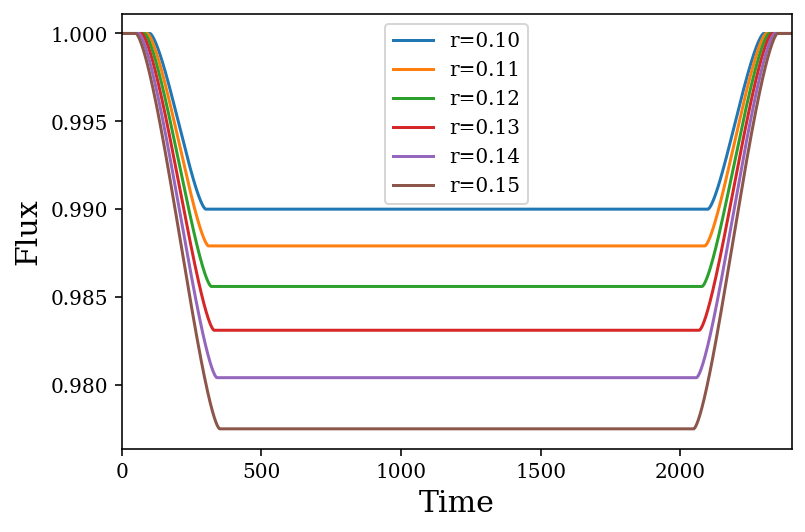

In [5]:
df = pd.DataFrame([])
df["r=0.10"] = pd.read_csv("r=0.10_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["r=0.11"] = pd.read_csv("r=0.11_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["r=0.12"] = pd.read_csv("r=0.12_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["r=0.13"] = pd.read_csv("r=0.13_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["r=0.14"] = pd.read_csv("r=0.14_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["r=0.15"] = pd.read_csv("r=0.15_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_r_no_limb_darkening.png", dpi=300)
plt.show()

## Limb darkening

$\mu=\cos(\psi)$

$x=R\sin(\psi-\theta)$

- Linear: $\dfrac{I(\mu)}{I(1)}=1-u(1-\mu)$

- Quadratic: $\dfrac{I(\mu)}{I(1)}=1-a(1-\mu)-b(1-\mu)^{2}$

- 3 Parameters non-linear: $\dfrac{I(\mu)}{I(1)}=1-c_{2}(1-\mu)-c_{3}\left(1-\mu^{3 / 2}\right)-c_{4}\left(1-\mu^{2}\right)$

- 4 Parameters non-linear: $\dfrac{I(\mu)}{I(1)}=1-c_{1}\left(1-\mu^{1 / 2}\right)-c_{2}(1-\mu)-c_{3}\left(1-\mu^{3 / 2}\right)-c_{4}\left(1-\mu^{2}\right)$

In [324]:
def mu(R, r):
    a = 1e10
    theta1 = np.arcsin(r / R)
    theta2 = np.arctan(r / (a - R * np.cos(theta1)))
    return max(0, np.cos(theta1 + theta2))

In [325]:
linear = lambda mu, u: 1 - u[0] * (1 - mu)
quadratic = lambda mu, u: 1 - u[0] * (1 - mu) - u[1] * (1 - mu) ** 2
non_linear3 = (
    lambda mu, u: 1 - u[0] * (1 - mu) - u[1] * (1 - mu ** 1.5) - u[2] * (1 - mu ** 2)
)
non_linear4 = (
    lambda mu, u: 1
    - u[0] * (1 - mu ** 0.5)
    - u[1] * (1 - mu)
    - u[2] * (1 - mu ** 1.5)
    - u[3] * (1 - mu ** 2)
)

In [332]:
star = Circle(cx=0, cy=0, r=1000)
star_img = star.img(limb_darkening=linear, u=[0.5])

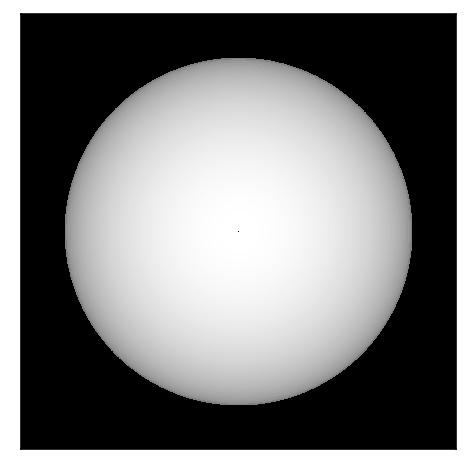

In [333]:
plot(star_img)

In [334]:
star = Circle(cx=0, cy=0, r=1000)
star_img = star.img(limb_darkening=quadratic, u=[0.3, 0.2])

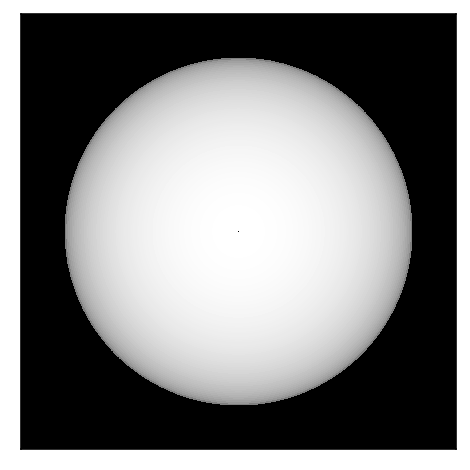

In [335]:
plot(star_img)

In [326]:
star = Circle(cx=0, cy=0, r=1000)
star_img = star.img(limb_darkening=non_linear3, u=[1.8, -1.8, 0.7])

In [327]:
plot(star_img)

In [329]:
star = Circle(cx=0, cy=0, r=1000)
star_img = star.img(limb_darkening=non_linear4, u=[0.3, 0.6, -0.5, 0.1])

In [330]:
plot(star_img)

In [331]:
for r in np.arange(100, 160, 10):
    planet = Circle(cx=-1200, cy=0, r=r)
    light_curve = []
    for x in range(-1200, 0):
        planet.x = x
        transit = star_img - planet.img()
        transit[transit < 0] = 0
        light_curve.append(transit.sum())
    light_curve += light_curve[::-1]
    df = pd.DataFrame(light_curve)
    df.to_csv("r=%.2f_b=0.0_non_linear4=[0.3, 0.6, -0.5, 0.1].csv" % (r / 1000))

for b in np.arange(0.1, 0.9, 0.1):
    planet = Circle(cx=-1200, cy=b * 1000, r=100)
    light_curve = []
    for x in range(-1200, 0):
        planet.x = x
        transit = star_img - planet.img()
        transit[transit < 0] = 0
        light_curve.append(transit.sum())
    light_curve += light_curve[::-1]
    df = pd.DataFrame(light_curve)
    df.to_csv("r=0.10_b=%.1f_non_linear4=[0.3, 0.6, -0.5, 0.1].csv" % b)

In [6]:
df = pd.DataFrame([])
for b in np.arange(0.0, 0.9, 0.1):
    df["b=%.1f" % b] = pd.read_csv("r=0.10_b=%.1f_linear=[0.5].csv" % b, index_col=0)[
        "0"
    ]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_b_linear=[0.5].png", dpi=300)
plt.show()

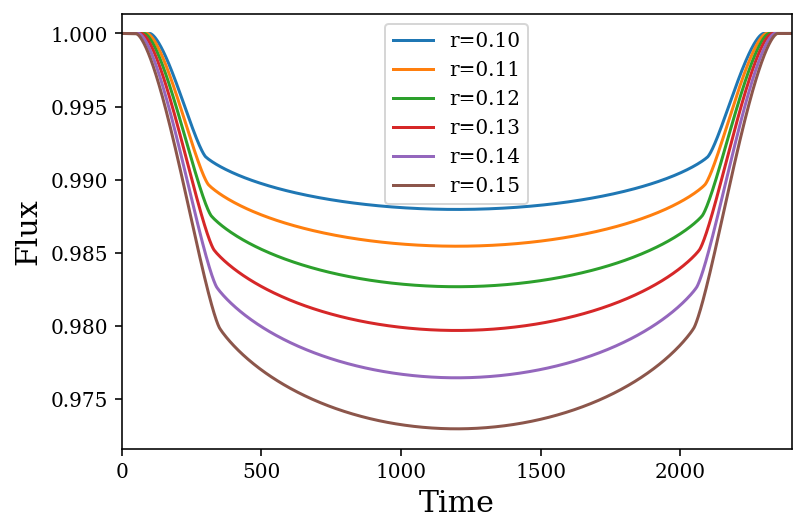

In [7]:
df = pd.DataFrame([])
for r in np.arange(0.10, 0.16, 0.01):
    df["r=%.2f" % r] = pd.read_csv("r=%.2f_b=0.0_linear=[0.5].csv" % r, index_col=0)[
        "0"
    ]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_r_linear=[0.5].png", dpi=300)
plt.show()

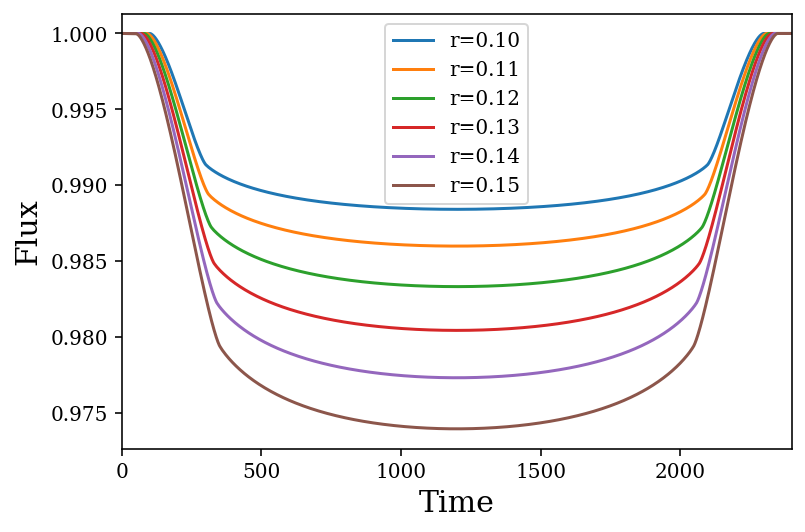

In [8]:
df = pd.DataFrame([])
for r in np.arange(0.10, 0.16, 0.01):
    df["r=%.2f" % r] = pd.read_csv(
        "r=%.2f_b=0.0_quadratic=[0.3,0.2].csv" % r, index_col=0
    )["0"]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.show()

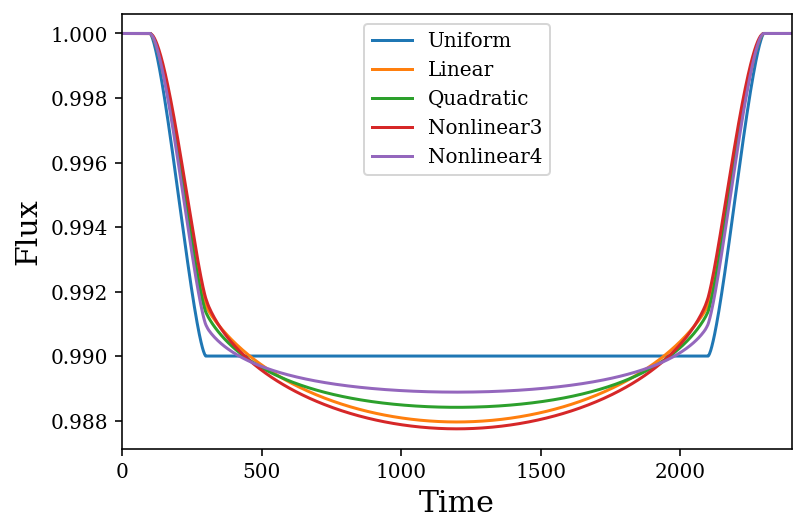

In [9]:
df = pd.DataFrame([])
["uniform", "linear", "quadratic", "nonlinear"]
df["Uniform"] = pd.read_csv("r=0.10_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
df["Linear"] = pd.read_csv("r=0.10_b=0.0_linear=[0.5].csv", index_col=0)["0"]
df["Quadratic"] = pd.read_csv("r=0.10_b=0.0_quadratic=[0.3,0.2].csv", index_col=0)["0"]
df["Nonlinear3"] = pd.read_csv(
    "r=0.10_b=0.0_non_linear3=[1.8, -1.8, 0.7].csv", index_col=0
)["0"]
df["Nonlinear4"] = pd.read_csv(
    "r=0.10_b=0.0_non_linear4=[0.3, 0.6, -0.5, 0.1].csv", index_col=0
)["0"]
df /= df.max()
df.plot()
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_limb_darkening.png", dpi=300)
plt.show()

# batman
[batman: 
Bad-Ass Transit Model cAlculatioN](https://www.cfa.harvard.edu/~lkreidberg/batman/tutorial.html#initializing-the-model)

In [1]:
import batman
import pandas as pd

%pylab inline
%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def light_curve(r=0.1, b=0, limb_dark="uniform", u=[]):
    i = lambda b: np.arccos(b / params.a) * 180 / np.pi
    params = batman.TransitParams()  # object to store transit parameters
    params.t0 = 0.0  # time of inferior conjunction
    params.per = 1.0  # orbital period
    params.rp = r  # planet radius (in units of stellar radii)
    params.a = 15.0  # semi-major axis (in units of stellar radii)
    params.inc = i(b)  # orbital inclination (in degrees)
    params.ecc = 0.0  # eccentricity
    params.w = 90.0  # longitude of periastron (in degrees)
    params.limb_dark = limb_dark  # limb darkening model
    params.u = u  # limb darkening coefficients [u1, u2, u3, u4]
    t = np.linspace(-0.0127, 0.0127, 2400)  # times at which to calculate light curve
    m = batman.TransitModel(params, t)  # initializes model
    return m.light_curve(params)

## Impact parameter

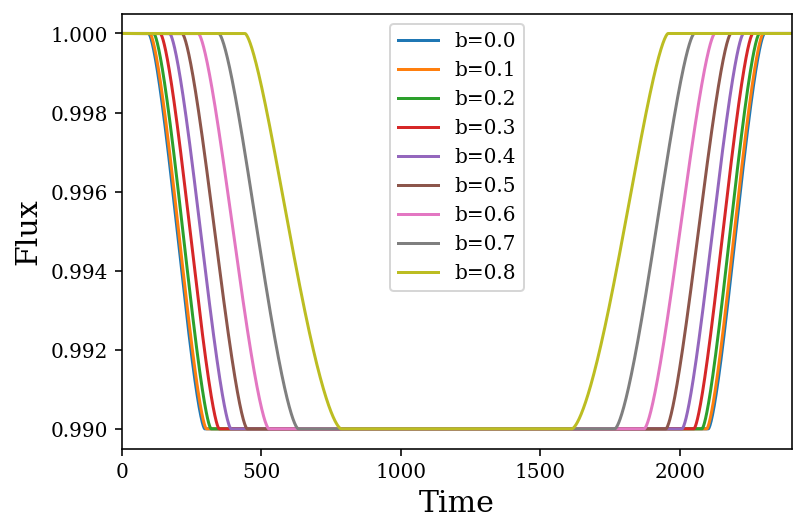

In [3]:
for b in np.arange(0, 0.9, 0.1):
    plt.plot(light_curve(b=b), label="b=%.1f" % b)
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("model_b_no_limb_darkening.png", dpi=300)
plt.show()

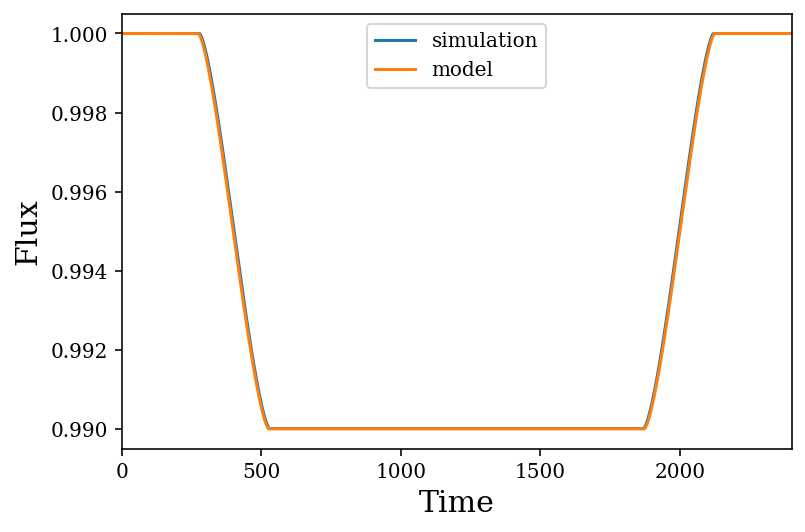

In [4]:
model = light_curve(r=0.1, b=0.6)
simulation = pd.read_csv("r=0.10_b=0.6_no_limb_darkening.csv", index_col=0)["0"]
simulation /= simulation.max()
plt.plot(simulation, label="simulation")
plt.plot(model, label="model")
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("simulation_model_no_limb_darkening.png", dpi=300)
plt.show()

## Radius ratio

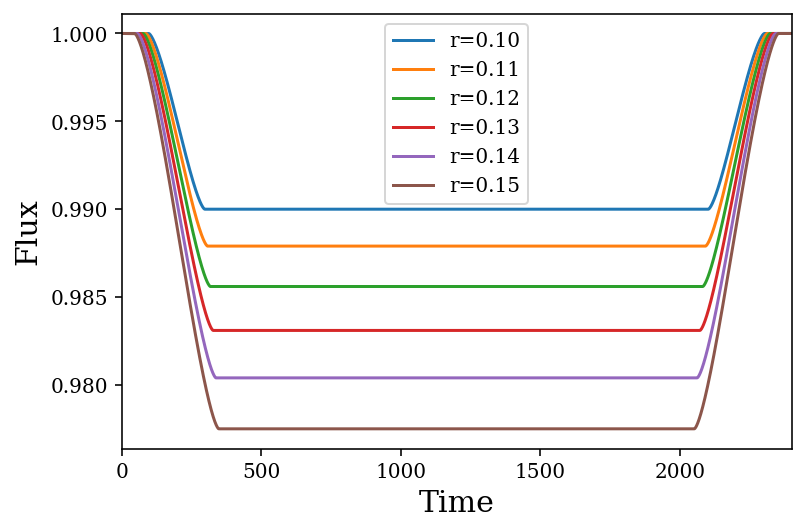

In [5]:
for r in np.arange(0.1, 0.16, 0.01):
    plt.plot(light_curve(r=r), label="r=%.2f" % r)
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("model_r_no_limb_darkening.png", dpi=300)
plt.show()

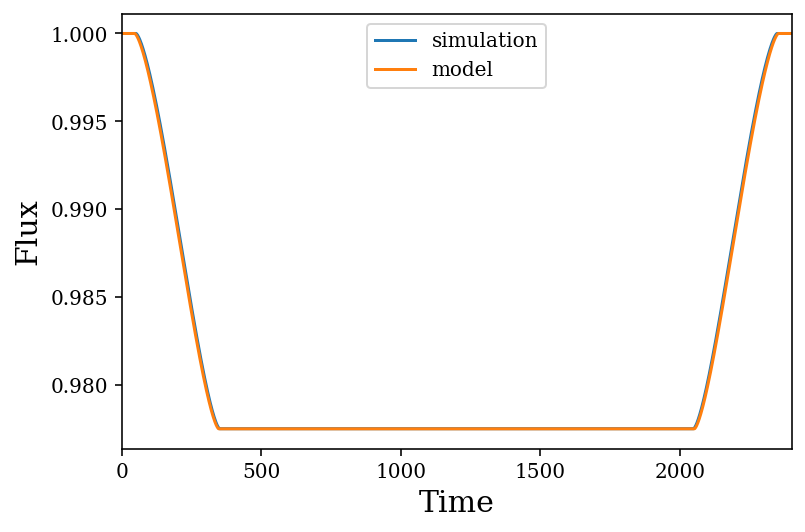

In [7]:
model = light_curve(r=0.15, b=0)
simulation = pd.read_csv("r=0.15_b=0.0_no_limb_darkening.csv", index_col=0)["0"]
simulation /= simulation.max()
plt.plot(simulation, label="simulation")
plt.plot(model, label="model")
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.xlim([0, 2400])
plt.legend()
plt.show()

## Limb darkening

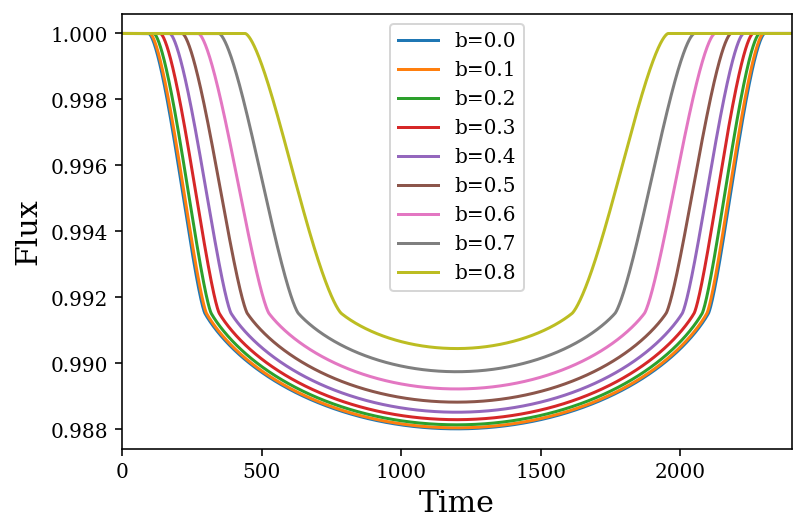

In [8]:
for b in np.arange(0.0, 0.9, 0.1):
    plt.plot(light_curve(b=b, limb_dark="linear", u=[0.5]), label="b=%.1f" % b)
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("model_b_linear=[0.5].png", dpi=300)
plt.show()

In [9]:
for r in np.arange(0.1, 0.16, 0.01):
    plt.plot(light_curve(r=r, limb_dark="linear", u=[0.5]), label="r=%.2f" % r)
plt.legend(loc=9)
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.savefig("model_r_linear=[0.5].png", dpi=300)
plt.show()

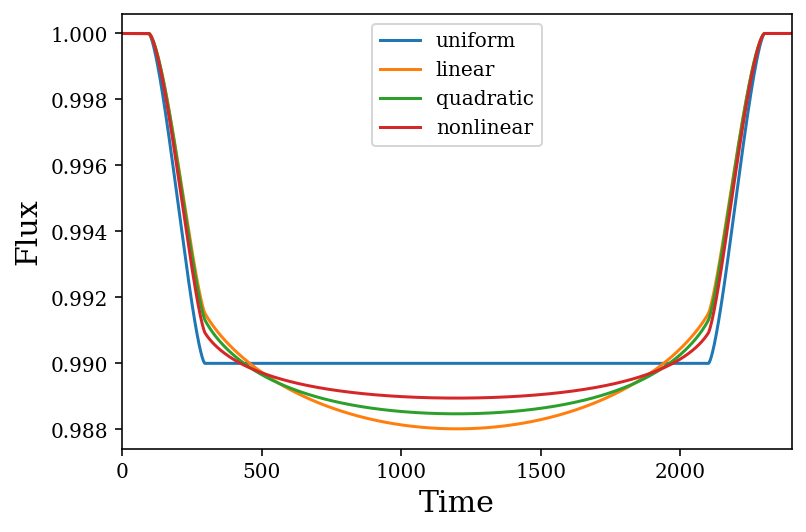

In [3]:
ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
ld_coefficients = [[], [0.5], [0.3, 0.2], [0.3, 0.6, -0.5, 0.1]]
for i in range(4):
    plt.plot(
        light_curve(limb_dark=ld_options[i], u=ld_coefficients[i]), label=ld_options[i]
    )
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.xlim([0, 2400])
plt.legend()
plt.savefig("model_limb_darkening.png", dpi=300)
plt.show()

In [11]:
model = light_curve(limb_dark="linear", u=[0.5])
simulation = pd.read_csv("r=0.10_b=0.0_linear=[0.5].csv", index_col=0)["0"]
simulation /= simulation.max()
plt.plot(simulation, label="simulation")
plt.plot(model, label="model")
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.title("Linear", fontsize=20, pad=10)
plt.savefig("simulation_model_linear=[0.5].png", dpi=300)
plt.show()

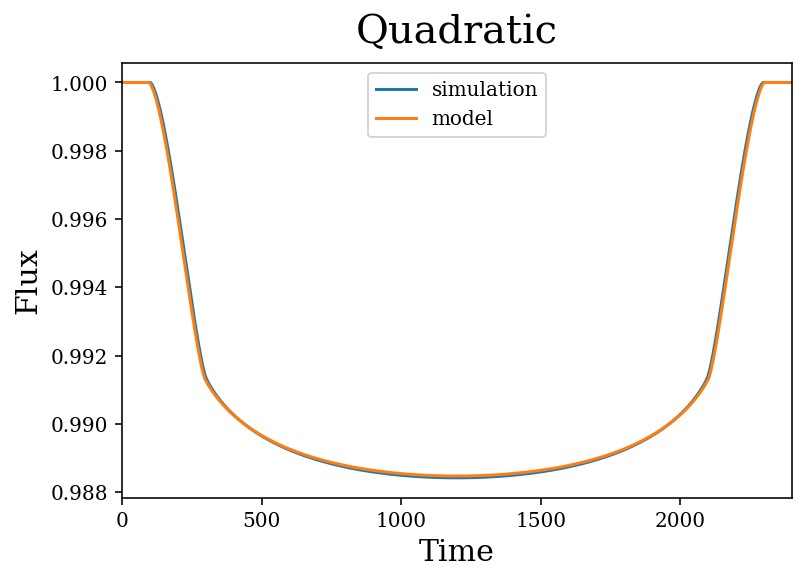

In [12]:
model = light_curve(limb_dark="quadratic", u=[0.3, 0.2])
simulation = pd.read_csv("r=0.10_b=0.0_quadratic=[0.3,0.2].csv", index_col=0)["0"]
simulation /= simulation.max()
plt.plot(simulation, label="simulation")
plt.plot(model, label="model")
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.title("Quadratic", fontsize=20, pad=10)
plt.savefig("simulation_model_quadratic=[0.3,0.2].png", dpi=300)
plt.show()

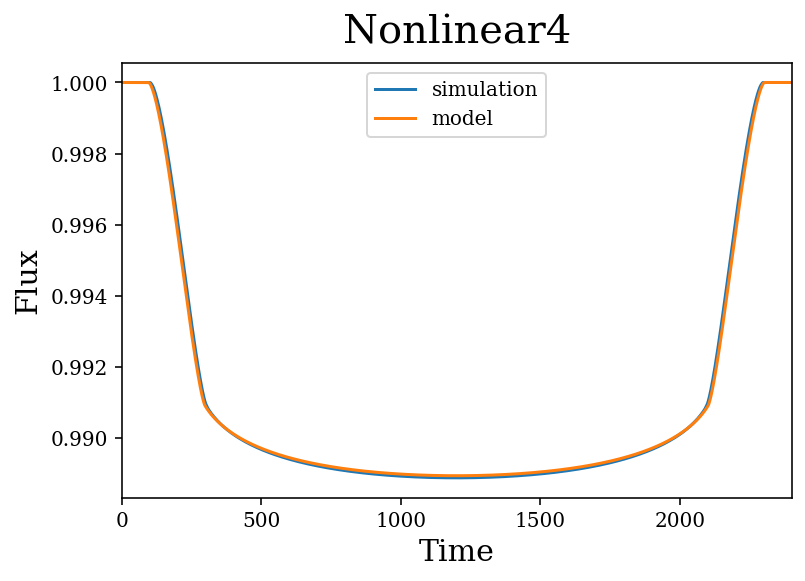

In [13]:
model = light_curve(limb_dark="nonlinear", u=[0.3, 0.6, -0.5, 0.1])
simulation = pd.read_csv(
    "r=0.10_b=0.0_non_linear4=[0.3, 0.6, -0.5, 0.1].csv", index_col=0
)["0"]
simulation /= simulation.max()
plt.plot(simulation, label="simulation")
plt.plot(model, label="model")
plt.legend()
plt.xlim([0, 2400])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.title("Nonlinear4", fontsize=20, pad=10)
plt.savefig("simulation_model_non_linear4=[0.3, 0.6, -0.5, 0.1].png", dpi=300)
plt.show()

# Limb darkening wavelength-dependence

[PyTransit](https://github.com/hpparvi/PyTransit)

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline

plt.rc("font", family="serif")

In [6]:
dfile = Path("data").joinpath("obs_data.fits")
data = pf.getdata(dfile, ext=1)

flux_keys = [n for n in data.names if "f_wn" in n]
filter_names = [k.split("_")[-1] for k in flux_keys]

time = data["time"].astype("d")
fluxes = [data[k].astype("d") for k in flux_keys]

print("Filter names: " + ", ".join(filter_names))

Filter names: u, g, r, i, z, J2, H2, Ks


In [7]:
with sb.axes_style("white"):
    fig, axs = subplots(1, 2, figsize=(13, 5), sharey=True)
    cp = sb.color_palette()
    axs[0].plot(time, fluxes[0], drawstyle="steps-mid", c=cp[0], label="u")
    axs[1].plot(time, fluxes[-1], drawstyle="steps-mid", c=cp[2], label="Ks")
    axs[0].legend(loc=3, fontsize=15)
    axs[1].legend(loc=3, fontsize=15)
    setp(axs, xlim=time[[0, -1]])
    fig.tight_layout()

# BLS periodogram

In [1]:
import pandas as pd
from astropy.timeseries import BoxLeastSquares

%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline
plt.style.use("classic")
plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


## K2 Data
- [EPIC 206103150](https://archive.stsci.edu/prepds/k2sff/html/c03/ep206103150.html)

In [2]:
import requests

url = "https://archive.stsci.edu/hlsps/k2sff/c03/206100000/03150/hlsp_k2sff_k2_lightcurve_206103150-c03_kepler_v1_llc-default-aper.txt"
response = requests.get(url)
data = dict(
    [
        (float(i.split(",")[0]), float(i.split(",")[1]))
        for i in response.text.split("\n")[1:-1]
    ]
)

In [3]:
df = pd.DataFrame([])
df["t"] = list(data.keys())
df["flux"] = list(data.values())
df.head()

t      flux
0  2146.452489  1.000410
1  2146.513785  1.000296
2  2146.534218  1.000208
3  2146.554650  1.000183
4  2146.575082  1.000185

In [4]:
model = BoxLeastSquares(df["t"], df["flux"])
periodogram = model.autopower(0.1)  # transit duration
period, power = periodogram.period, periodogram.power

In [9]:
import heapq

plt.figure(figsize=(12, 4))
for peak_y in heapq.nlargest(1, power):
    loc = max(power) / 20 + peak_y
    xn = period[list(power).index(peak_y)]
    plt.text(xn, loc, "%.7f" % xn, ha="center", fontsize=10)
    plt.scatter(xn, peak_y, s=50, color="b", alpha=0.5)
plt.plot(period, power)
plt.xlim([0, 35])
plt.ylim([-0.0005, loc * 1.1])
plt.xlabel("Period / BJD", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.grid()
plt.savefig("BLS.png", dpi=300)
plt.show()

BLS 得到的周期和 FFT 得到的结果接近

In [7]:
print("周期: %.7f BJD" % xn)

周期: 4.1576477 BJD


In [10]:
df["phase"] = df["t"] % xn / xn
df["tn"] = df["t"] // xn
phase = df.groupby("tn")
df["flux_norm"] = phase["flux"].transform(lambda x: x / x.median())
df.head()

t      flux     phase     tn  flux_norm
0  2146.452489  1.000410  0.266087  516.0   1.000621
1  2146.513785  1.000296  0.280830  516.0   1.000507
2  2146.534218  1.000208  0.285744  516.0   1.000420
3  2146.554650  1.000183  0.290659  516.0   1.000394
4  2146.575082  1.000185  0.295573  516.0   1.000397

舍去头尾不完整的数据

In [11]:
phase.size()

tn
516.0    139
517.0    191
518.0    191
519.0    182
520.0    184
521.0    177
522.0    178
523.0    177
524.0    182
525.0    183
526.0    195
527.0    174
528.0    173
529.0    171
530.0    179
531.0    178
532.0     59
dtype: int64

In [12]:
from scipy.signal import find_peaks

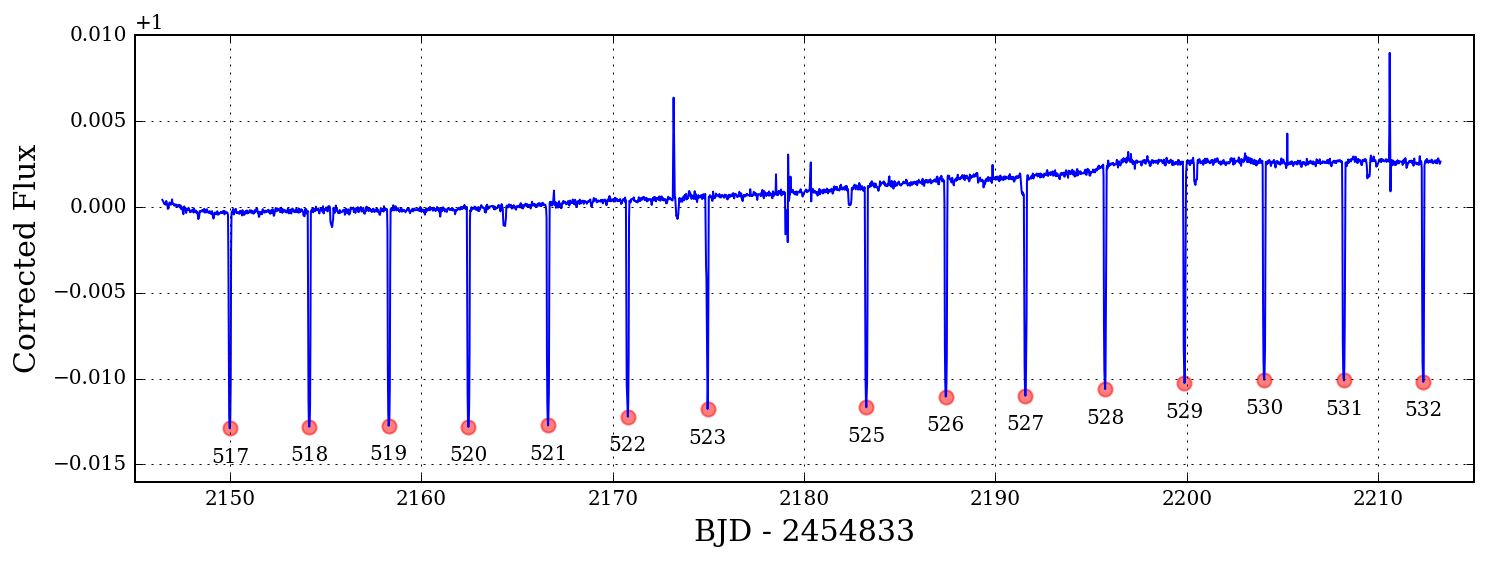

In [16]:
peaks = find_peaks(df["flux"] * -1, distance=100, height=-0.99)[0]
plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["flux"])
for p in peaks:
    plt.scatter(df["t"][p], df["flux"][p], color="r", alpha=0.5, s=50)
    plt.text(
        df["t"][p],
        df["flux"][p] - 0.002,
        "%.0f" % df["tn"][p],
        ha="center",
        fontsize=10,
    )
plt.xlim([2145, 2215])
plt.ylim([0.984, 1.01])
plt.xlabel("BJD - 2454833", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.grid()
plt.savefig("K2.png", dpi=300)
plt.show()

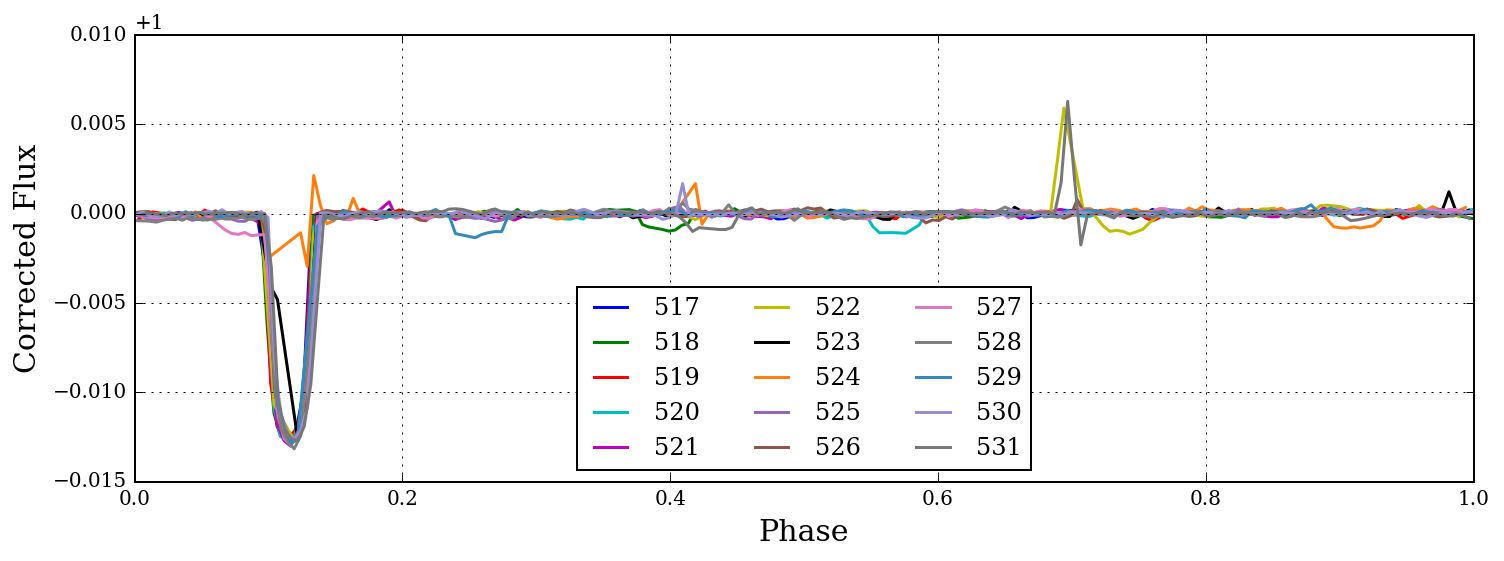

In [36]:
colors = (
    ["b", "g", "r", "c", "m", "y", "k"]
    + ["#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]
    + ["#348ABD", "#988ED5", "#777777", "#FBC15E", "#8EBA42", "#FFB5B8"]
)
plt.figure(figsize=(12, 4))
for group in list(phase.groups.keys())[1:-1]:
    plt.plot(
        df["phase"][phase.groups[group]],
        df["flux_norm"][phase.groups[group]],
        label=int(group),
        color=colors.pop(0),
        lw=1.5,
    )
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.legend(loc=8, ncol=3)
plt.grid()
plt.savefig("BLS_combine.png", dpi=300)
plt.show()

In [32]:
colors = (
    ["b", "g", "r", "c", "m", "y", "k"]
    + ["#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]
    + ["#348ABD", "#988ED5", "#777777", "#FBC15E", "#8EBA42", "#FFB5B8"]
)
plt.figure(figsize=(12, 4))
for group in list(phase.groups.keys())[1:-1]:
    if group not in [523, 524, 531]:
        plt.plot(
            df["phase"][phase.groups[group]],
            df["flux_norm"][phase.groups[group]],
            "-o",
            color=colors.pop(0),
            label=int(group),
        )
plt.xlim([0.08, 0.153])
plt.ylim([0.985, 1.005])
plt.legend(loc=9, ncol=2)
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.grid()
plt.savefig("BLS_combine2.png", dpi=300)
plt.show()

In [9]:
df[~df["tn"].isin([516, 523, 524, 531, 532])].to_csv("K2_Data.csv")

# FFT (Fail)

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline
plt.style.use("classic")
plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import heapq


def plot_f(data, peak=1, file=None):
    plt.figure(figsize=(12, 4), facecolor="w")
    x = (len(data) - 1) / np.arange(1, len(data)) * 2 * 0.022582508285722724
    y = data[1:]
    plt.stem(x, y, use_line_collection=True)
    for peak_y in heapq.nlargest(peak, y):
        loc = max(y) / 20 + peak_y
        xn = x[list(y).index(peak_y)]
        plt.text(xn, loc, "%.4f" % xn, ha="center", fontsize=10)
    plt.xlabel("Period / BJD", fontsize=15)
    plt.ylabel("Amplitude", fontsize=15)
    plt.ylim([min(-max(y) * 0.05, min(y)) - abs(min(y)) * 0.5, max(y) * 1.15])
    plt.grid(True)
    if file != None:
        plt.savefig("%s.png" % file, dpi=300)
    plt.show()

测试信号

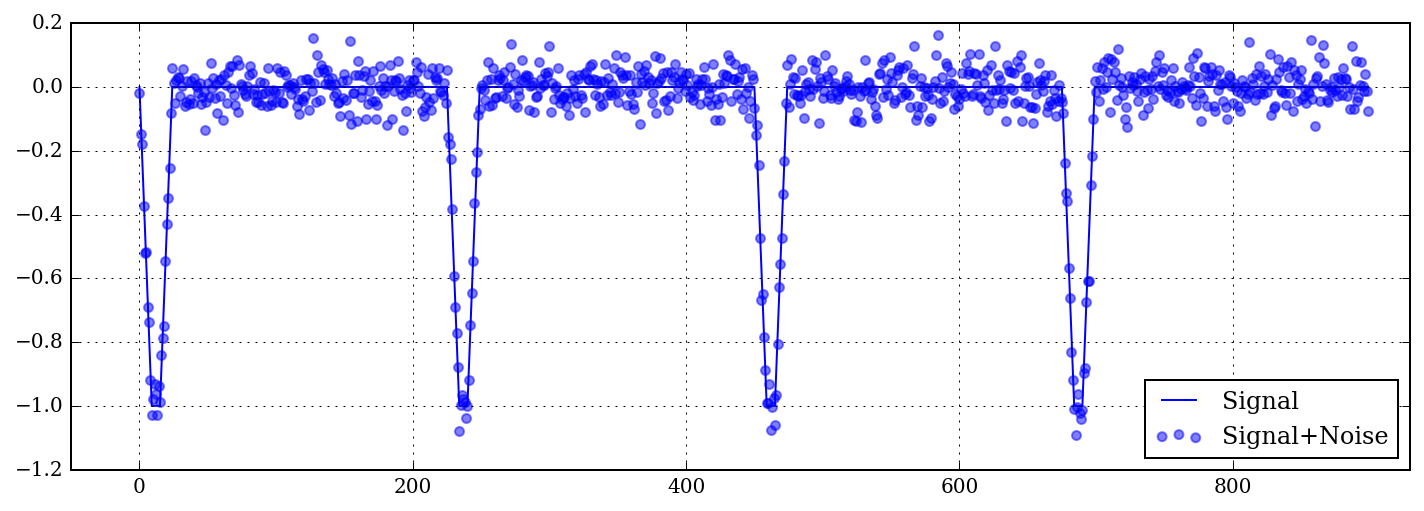

In [35]:
sig1 = list(-np.linspace(0, 0.5, 10) * 2)
sig2 = [-1] * 5
sig3 = list(np.linspace(-0.5, 0, 10) * 2)
sig4 = [0] * 200
sig = (sig1 + sig2 + sig3 + sig4) * 4
noise = np.random.randn(len(sig)) / 20
plt.figure(figsize=(12, 4))
plt.plot(sig, label="Signal")
plt.scatter(range(len(sig)), sig + noise, label="Signal+Noise", color="blue", alpha=0.5)
plt.xlim([-50, 930])
plt.ylim([-1.2, 0.2])
plt.legend(loc=4)
plt.grid()
plt.show()

Total length: 900
Period: 225.0


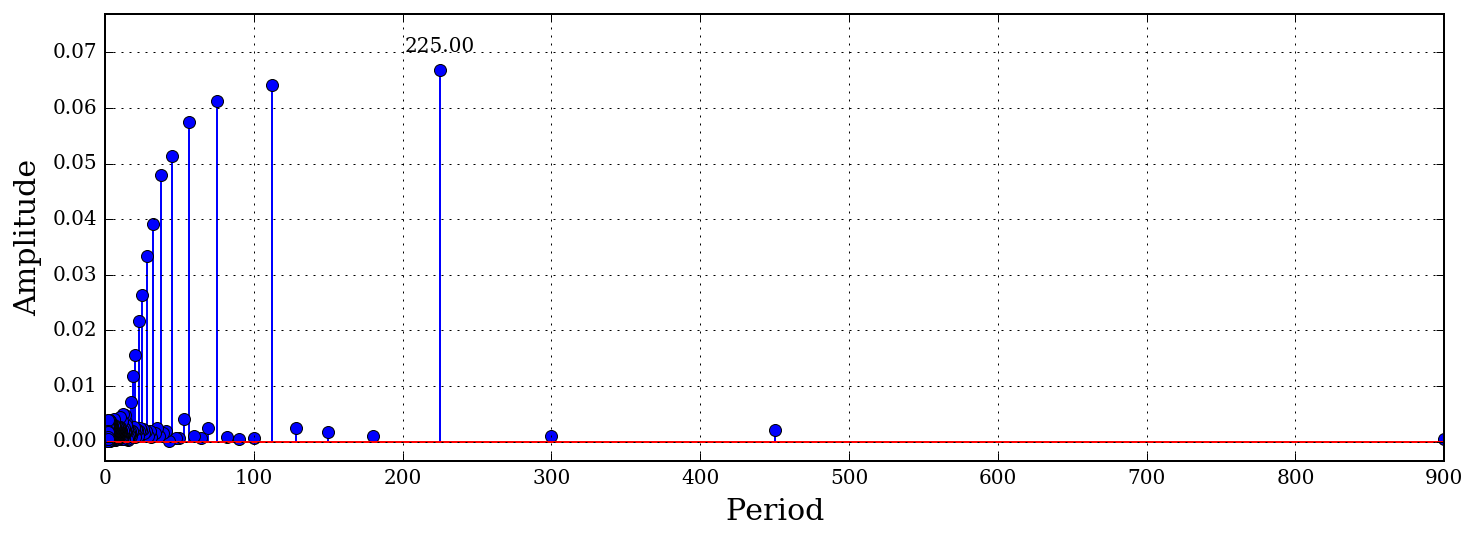

In [38]:
print("Total length:", len(sig))
print("Period:", len(sig) / 4)
plot_f(abs(np.fft.rfft(np.array(sig + noise) / len(sig + noise))), peak=1)

In [3]:
import pandas as pd

df = pd.read_csv("K2_Data.csv", index_col=0)
df.index = range(len(df))
df.head()

t      flux     phase     tn  flux_norm
0  2149.517299  0.999716  0.003237  517.0   1.000007
1  2149.537732  0.999641  0.008151  517.0   0.999931
2  2149.558164  0.999695  0.013066  517.0   0.999985
3  2149.578596  0.999704  0.017980  517.0   0.999995
4  2149.599028  0.999637  0.022894  517.0   0.999927

取前半部、后半部分别 FFT

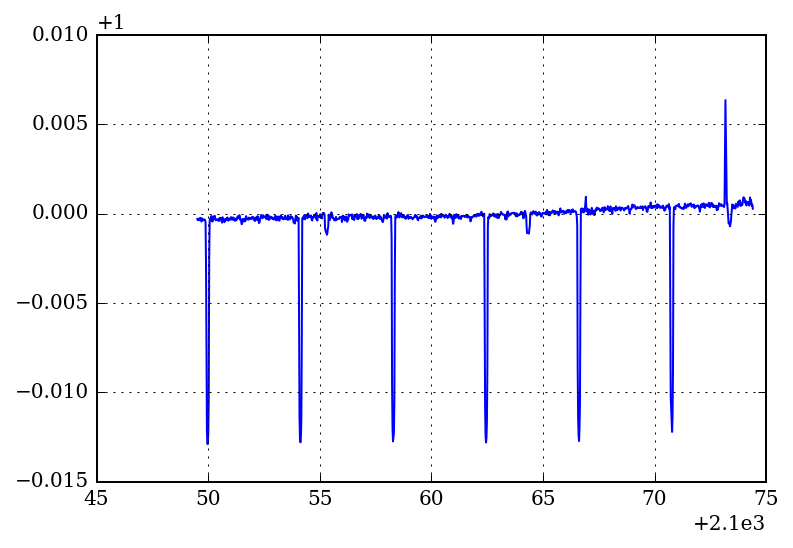

In [4]:
plt.figure(figsize=(6, 4))
x1 = df["t"][df["tn"].isin(range(517, 523))]
y1 = df["flux"][df["tn"].isin(range(517, 523))]
plt.plot(x1, y1)
plt.grid()
plt.show()

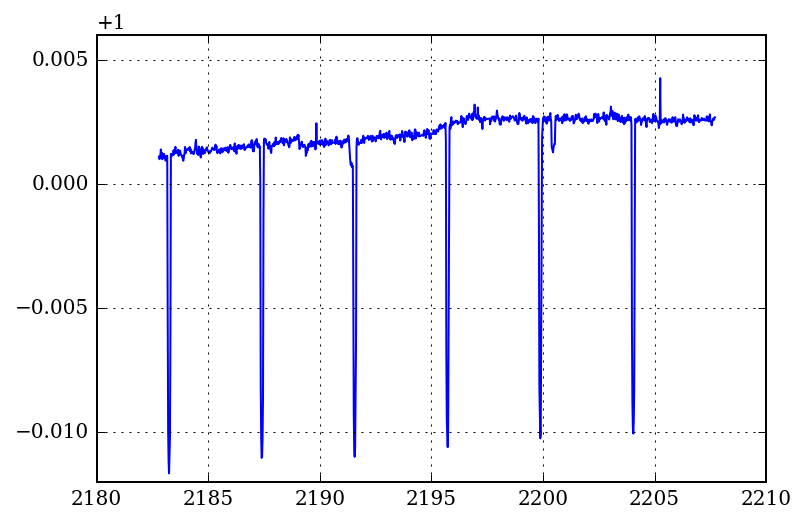

In [5]:
plt.figure(figsize=(6, 4))
x2 = df["t"][df["tn"].isin(range(523, 531))]
y2 = df["flux"][df["tn"].isin(range(523, 531))]
plt.plot(x2, y2)
plt.grid()
plt.show()

非均匀离散傅里叶变换：插值

In [6]:
from scipy.interpolate import interp1d

In [7]:
def interp(xdata, ydata):
    newx = np.linspace(min(xdata), max(xdata), len(xdata))
    return newx, interp1d(newx, ydata)(newx)

In [8]:
newx1, newy1 = interp(x1, y1)
newx2, newy2 = interp(x2, y2)

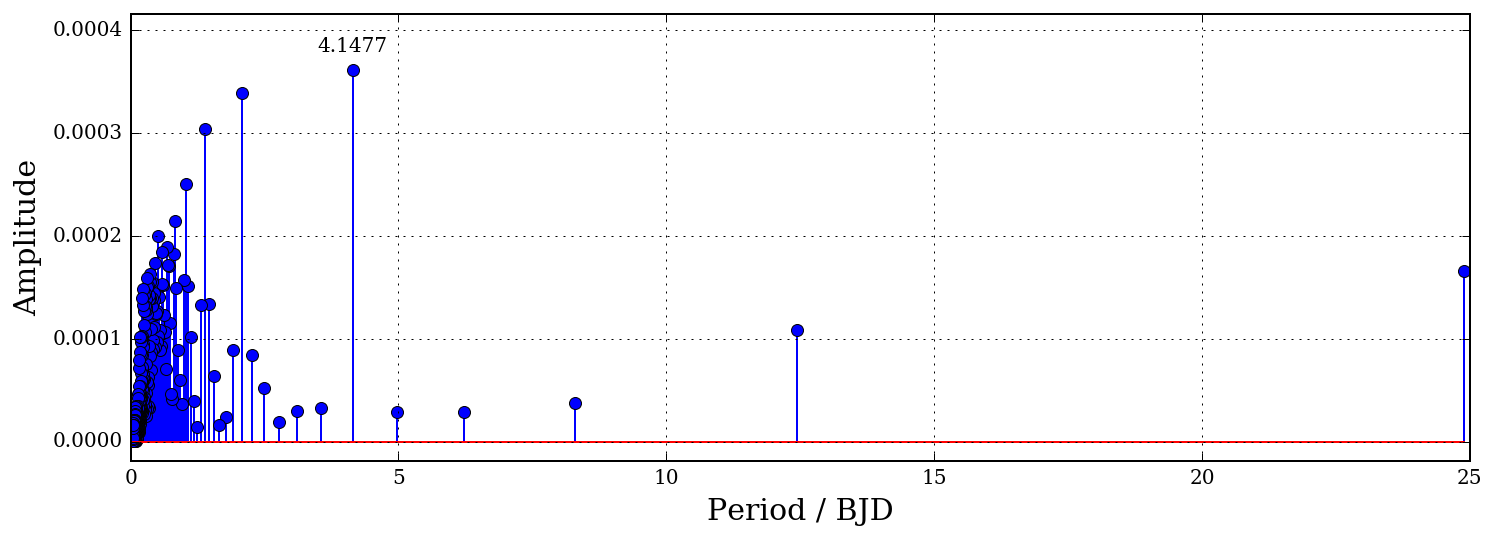

In [11]:
plot_f(abs(np.fft.rfft(newy1 / len(newy1))), peak=1, file="FFT1")

In [10]:
dx = newx1[1] - newx1[0]
P1 = 183.67 * dx
df1 = pd.DataFrame([])
df1["t"] = newx1
df1["flux"] = newy1
df1["phase"] = df1["t"] % P1 / P1
df1["tn"] = df1["t"] // P1
phase = df1.groupby("tn")
df1["flux_norm"] = phase["flux"].transform(lambda x: x / x.median())
df1.head()

t      flux     phase     tn  flux_norm
0  2149.517299  0.999716  0.239534  518.0   1.000027
1  2149.539882  0.999641  0.244979  518.0   0.999951
2  2149.562464  0.999695  0.250423  518.0   1.000005
3  2149.585047  0.999704  0.255868  518.0   1.000015
4  2149.607630  0.999637  0.261313  518.0   0.999947

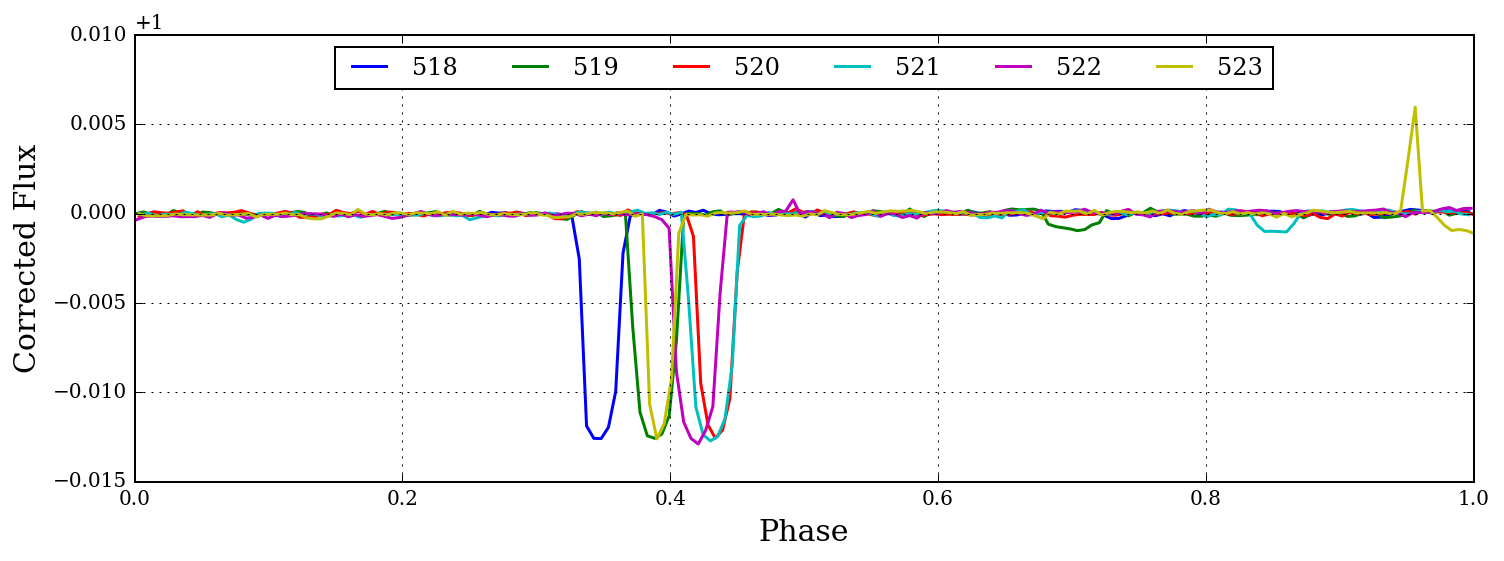

In [15]:
plt.figure(figsize=(12, 4))
for group in list(phase.groups.keys())[0:-1]:
    plt.plot(
        df1["phase"][phase.groups[group]],
        df1["flux_norm"][phase.groups[group]],
        label=int(group),
        lw=1.5,
    )
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.legend(loc=9, ncol=6)
plt.grid()
plt.savefig("FFT1_combine.png", dpi=300)
plt.show()

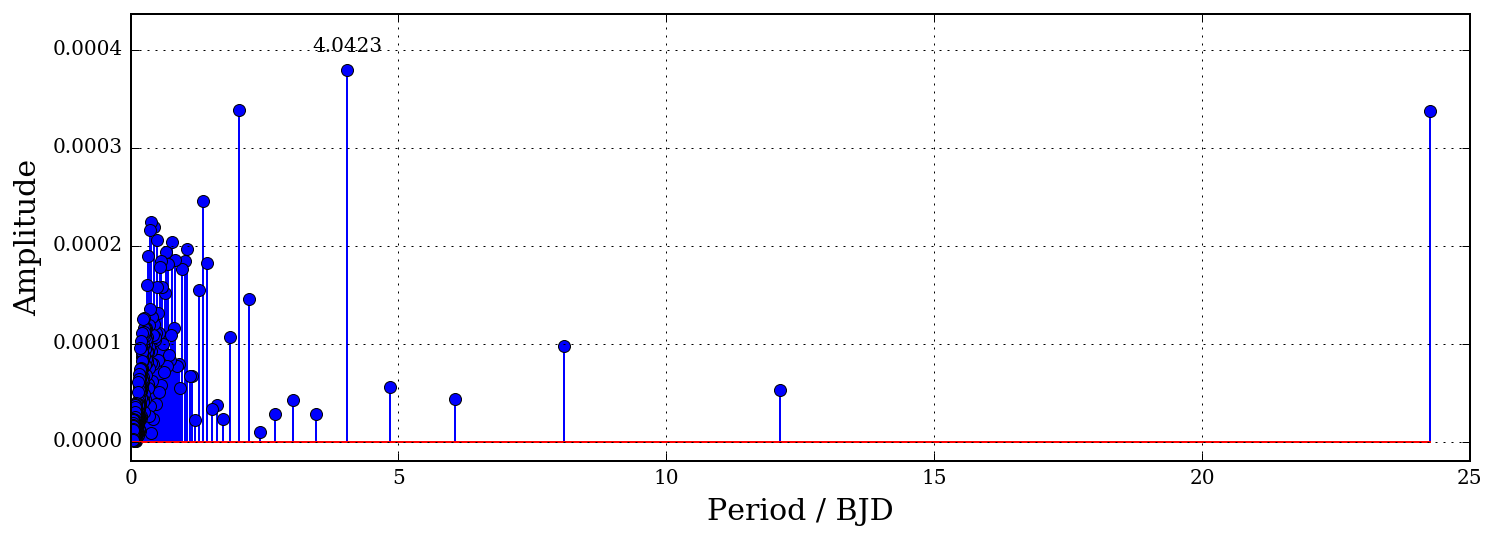

In [12]:
plot_f(abs(np.fft.rfft(newy2 / len(newy2))), peak=1, file="FFT2")

In [16]:
dx = newx2[1] - newx2[0]
P2 = 179 * dx
df2 = pd.DataFrame([])
df2["t"] = newx2
df2["flux"] = newy2
df2["phase"] = df2["t"] % P2 / P2
df2["tn"] = df2["t"] // P2
phase = df2.groupby("tn")
df2["flux_norm"] = phase["flux"].transform(lambda x: x / x.median())
df2.head()

t      flux     phase     tn  flux_norm
0  2182.800599  1.001106  0.848169  525.0   1.000021
1  2182.823789  1.001000  0.853756  525.0   0.999916
2  2182.846979  1.001174  0.859342  525.0   1.000089
3  2182.870169  1.001394  0.864929  525.0   1.000309
4  2182.893359  1.001128  0.870516  525.0   1.000043

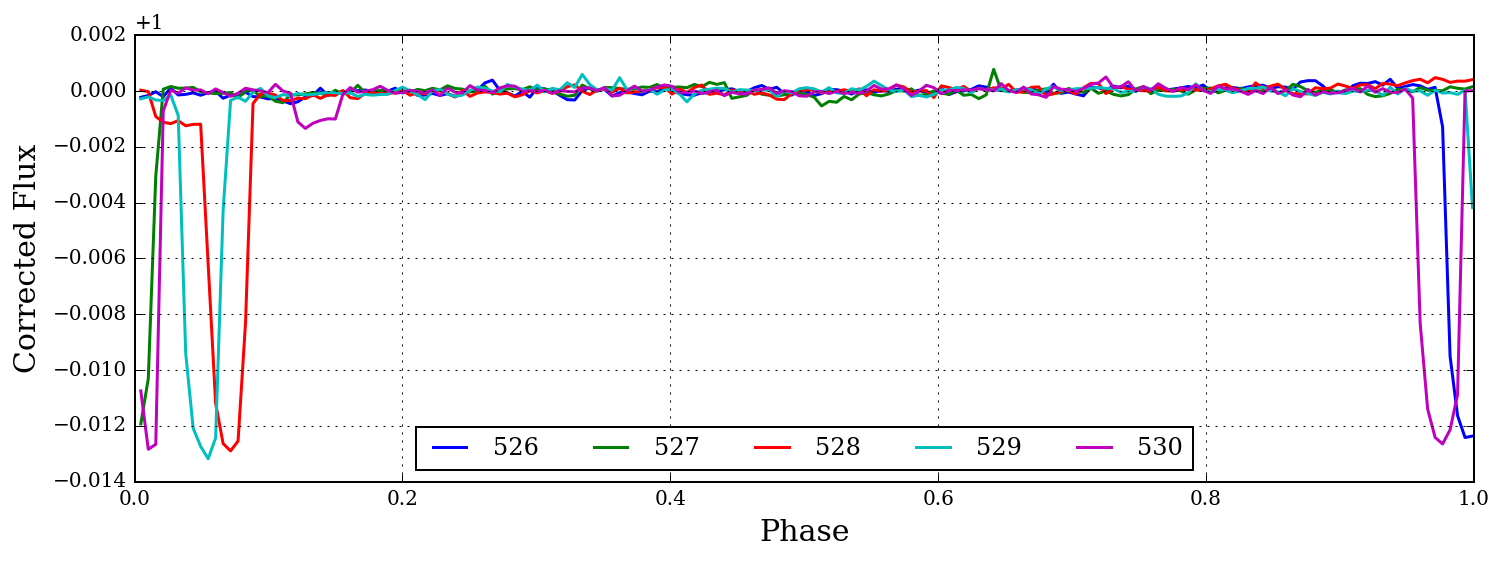

In [17]:
plt.figure(figsize=(12, 4))
for group in list(phase.groups.keys())[1:-1]:
    plt.plot(
        df2["phase"][phase.groups[group]],
        df2["flux_norm"][phase.groups[group]],
        label=int(group),
        lw=1.5,
    )
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.legend(loc=8, ncol=5)
plt.grid()
plt.savefig("FFT2_combine.png", dpi=300)
plt.show()

# Fitting (Mean)

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline
plt.style.use("classic")
plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

df = pd.read_csv("K2_Data.csv", index_col=0).sort_values(by=["phase"])
df.index = range(len(df))
df.head()

t      flux     phase     tn  flux_norm
0  2153.664993  0.999696  0.000843  518.0   0.999899
1  2161.980759  0.999947  0.000956  520.0   0.999963
2  2170.296466  1.000402  0.001055  522.0   0.999960
3  2186.927769  1.001715  0.001226  526.0   1.000069
4  2195.243400  1.002200  0.001307  528.0   0.999613

In [3]:
df_curve = df[(0.08 < df["phase"]) & (df["phase"] < 0.15)].copy()
df_curve.index = range(len(df_curve))

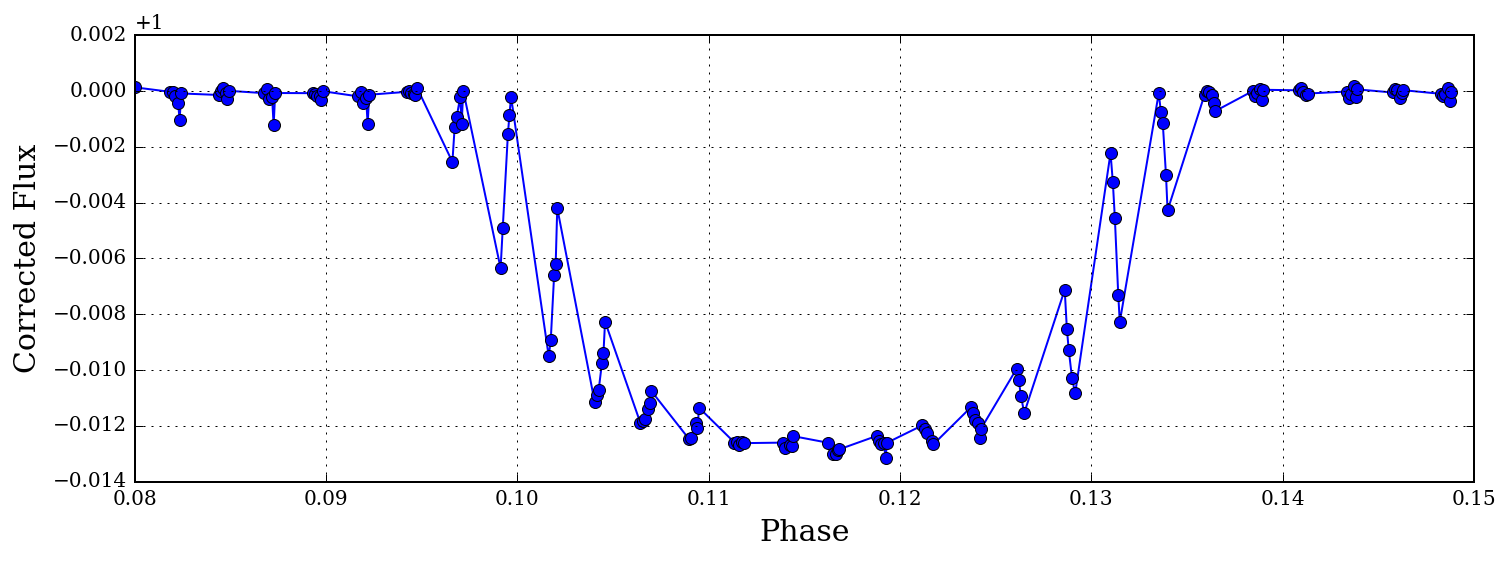

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(df_curve["phase"], df_curve["flux_norm"], "-o")
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.grid()
plt.show()

In [4]:
df_curve["cluster"] = np.cumsum(
    (df_curve["phase"] - df_curve["phase"].shift(1)) > 0.001
)
df_curve.head()

t      flux     phase     tn  flux_norm  cluster
0  2203.885946  1.002704  0.080018  530.0   1.000131        0
1  2149.844212  0.999679  0.081866  517.0   0.999969        1
2  2158.160009  0.999809  0.081987  519.0   0.999981        1
3  2166.475742  1.000119  0.082092  521.0   0.999838        1
4  2183.107073  1.000941  0.082270  525.0   0.999577        1

In [6]:
cluster = df_curve.groupby("cluster")
mean = cluster.mean()

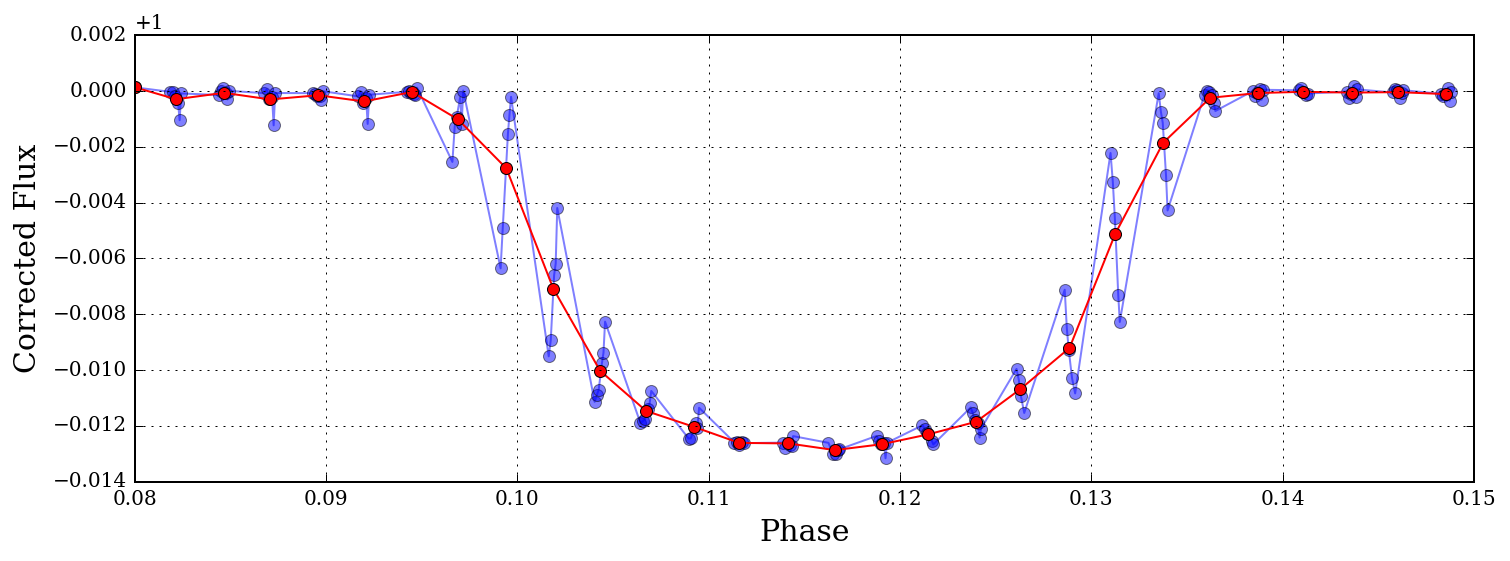

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(df_curve["phase"], df_curve["flux_norm"], "-o", alpha=0.5)
plt.plot(mean["phase"], mean["flux_norm"], "-ro")
plt.xlabel("Phase", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.grid()
plt.show()

WASP-47 (EPIC 206103150)

- $R_*$: 1.137 $R_\odot$ = 0.005 AU
- $T$: 5552 K
- $\log g$: 4.3437
- $[M/H]$: 0.18 (± 0.07)
- $\rho$: 0.999 g/cm3
- Limb darkening $q_1$: 0.396
- Limb darkening $q_2$: 0.423

WASP-47 b

- $r$: 0.10193
- $i$: 88.98 deg
- $P$: 4.1591289 day
- $a$: 9.702 $R_*$
- $b$: 0.173
- Transit duration: 3.5722 hr = 0.1488 day

> [ref](https://iopscience.iop.org/article/10.3847/1538-3881/aa918b)

In [7]:
xdata, ydata = mean["phase"] * 4.15764766242576, mean["flux_norm"]

In [8]:
t0 = xdata[ydata[ydata == ydata.min()].index[0]]
xdata -= t0

In [9]:
import batman
from scipy.interpolate import interp1d
from scipy.optimize import leastsq

In [10]:
def light_curve2(r=0.10193, b=0.173, a=9.702, u=[0.396, 0.423]):
    i = lambda b: np.arccos(b / a) * 180 / np.pi
    params = batman.TransitParams()  # object to store transit parameters
    params.t0 = 0.0  # time of inferior conjunction
    params.per = 4.1591289  # orbital period
    params.rp = r  # planet radius (in units of stellar radii)
    params.a = a  # semi-major axis (in units of stellar radii)
    params.inc = i(b)  # orbital inclination (in degrees)
    params.ecc = 0.0  # eccentricity
    params.w = 90.0  # longitude of periastron (in degrees)
    params.limb_dark = "quadratic"  # limb darkening model\
    params.u = u  # limb darkening coefficients [u1, u2, u3, u4]
    t = np.linspace(-0.15, 0.15, 2400)  # times at which to calculate light curve
    m = batman.TransitModel(params, t)  # initializes model
    return m.light_curve(params)

In [11]:
def func(t, r, b, a, u1, u2):
    f = interp1d(
        np.linspace(-0.15, 0.15, 2400),
        light_curve2(r=r, b=b, a=a, u=[u1, u2]),
        fill_value="extrapolate",
    )
    return f(t)

In [12]:
def err(p, t, y):
    return (y - func(t, *p)) ** 2

In [13]:
[r, b, a, u1, u2], p = leastsq(err, [0.1, 0.17, 10, 0.4, 0.4], args=(xdata, ydata))
[r, b, a, u1, u2]

[0.10759529063305737,
 0.7416082263227535,
 6.33195981539464,
 -0.5274974216269274,
 1.8057761188510966]

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(
    df_curve["phase"] * 4.15764766242576 - t0,
    df_curve["flux_norm"],
    "-o",
    alpha=0.5,
    label="Data",
)
plt.plot(xdata, ydata, "-o", label="Mean")
x = np.linspace(-0.14, 0.14, 2400)
plt.plot(x, func(x, r=r, b=b, a=a, u1=u1, u2=u2), lw=2, label="Fitting")
plt.plot(
    np.linspace(-0.15, 0.15, 2400),
    light_curve2(r=0.10193, b=0.173, a=9.702, u=[0.396, 0.423]),
    label="Model",
    lw=2,
)
plt.xlabel("Time / BJD", fontsize=15)
plt.ylabel("Corrected Flux", fontsize=15)
plt.xlim([-0.16, 0.16])
plt.legend(loc=9)
plt.grid()
plt.savefig("mean.png", dpi=300)
plt.show()

In [72]:
print("行星半径：%.2f (地球半径)" % (r * 1.104 / 0.0091577))

行星半径：13.55 (地球半径)


In [75]:
print("轨道倾角：%.2f" % (np.arccos(b / a) / np.pi * 180))

轨道倾角：93.41


# Fitting (Individual)

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext lab_black
%pylab inline
plt.style.use("classic")
plt.rc("font", family="serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

df = pd.read_csv("K2_Data.csv", index_col=0)
df.index = range(len(df))
df.head()

t      flux     phase     tn  flux_norm
0  2149.517299  0.999716  0.003237  517.0   1.000007
1  2149.537732  0.999641  0.008151  517.0   0.999931
2  2149.558164  0.999695  0.013066  517.0   0.999985
3  2149.578596  0.999704  0.017980  517.0   0.999995
4  2149.599028  0.999637  0.022894  517.0   0.999927

WASP-47 (EPIC 206103150)

- $R_*$: 1.137 $R_\odot$ = 0.005 AU
- $T$: 5552 K
- $\log g$: 4.3437
- $[M/H]$: 0.18 (± 0.07)
- $\rho$: 0.999 g/cm3
- Limb darkening $q_1$: 0.396
- Limb darkening $q_2$: 0.423

WASP-47 b

- $r$: 0.10193
- $i$: 88.98 deg
- $P$: 4.1591289 day
- $a$: 9.702 $R_*$
- $b$: 0.173
- Transit duration: 3.5722 hr = 0.1488 day

> [ref](https://iopscience.iop.org/article/10.3847/1538-3881/aa918b)

In [3]:
import batman
from scipy.interpolate import interp1d
from scipy.optimize import leastsq
import warnings

warnings.filterwarnings("ignore")

In [4]:
def light_curve2(r=0.10193, b=0.173, a=9.702, u=[0.396, 0.423]):
    i = lambda b: np.arccos(b / a) * 180 / np.pi
    params = batman.TransitParams()  # object to store transit parameters
    params.t0 = 0.0  # time of inferior conjunction
    params.per = 4.1591289  # orbital period
    params.rp = r  # planet radius (in units of stellar radii)
    params.a = a  # semi-major axis (in units of stellar radii)
    params.inc = i(b)  # orbital inclination (in degrees)
    params.ecc = 0.0  # eccentricity
    params.w = 90.0  # longitude of periastron (in degrees)
    params.limb_dark = "quadratic"  # limb darkening model\
    params.u = u  # limb darkening coefficients [u1, u2, u3, u4]
    t = np.linspace(-0.15, 0.15, 2400)  # times at which to calculate light curve
    m = batman.TransitModel(params, t)  # initializes model
    return m.light_curve(params)

In [5]:
def func(t, r, b, a, u1, u2):
    f = interp1d(
        np.linspace(-0.15, 0.15, 2400),
        light_curve2(r=r, b=b, a=a, u=[u1, u2]),
        fill_value="extrapolate",
    )
    return f(t)

In [6]:
def err(p, t, y):
    return (y - func(t, *p)) ** 2

In [7]:
def plot_fit(xdata, ydata, r, b, a, u1, u2, tn):
    plt.figure(figsize=(12, 4))
    plt.plot(xdata, ydata, "-o", label="Data")
    x = np.linspace(-0.14, 0.14, 2400)
    plt.plot(x, func(x, r=r, b=b, a=a, u1=u1, u2=u2), "r", lw=2, label="Fitting")
    plt.plot(
        np.linspace(-0.15, 0.15, 2400),
        light_curve2(r=0.10193, b=0.173, a=9.702, u=[0.396, 0.423]),
        label="Model",
        lw=2,
    )
    bbox_props = dict(fc="w", ec="0.5")
    parms = "$r=%.2f$\n$b=%.2f$\n$a=%.2f$\n$u_1=%.2f$\n$u_2=%.2f$" % (r, b, a, u1, u2)
    plt.text(-0.135, 0.99, parms, size=15, bbox=bbox_props)
    plt.xlabel("Time (BJD)", fontsize=15)
    plt.ylabel("Corrected Flux", fontsize=15)
    plt.title("#%s" % tn, fontsize=20, pad=10)
    plt.xlim([-0.16, 0.16])
    plt.ylim([0.986, 1.002])
    plt.legend(loc=9)
    plt.grid()
    plt.savefig("%s.png" % tn, dpi=300)
    plt.show()

In [8]:
def main(tn):
    xdata, ydata = (
        df[df["tn"] == tn]["phase"] * 4.15764766242576,
        df[df["tn"] == tn]["flux_norm"],
    )
    t0 = xdata[ydata[ydata == ydata.min()].index[0]]
    xdata -= t0
    [r, b, a, u1, u2], p = leastsq(err, [0.1, 0.17, 10, 0.4, 0.4], args=(xdata, ydata))
    plot_fit(xdata, ydata, r, b, a, u1, u2, tn)
    return [r, b, a, u1, u2]

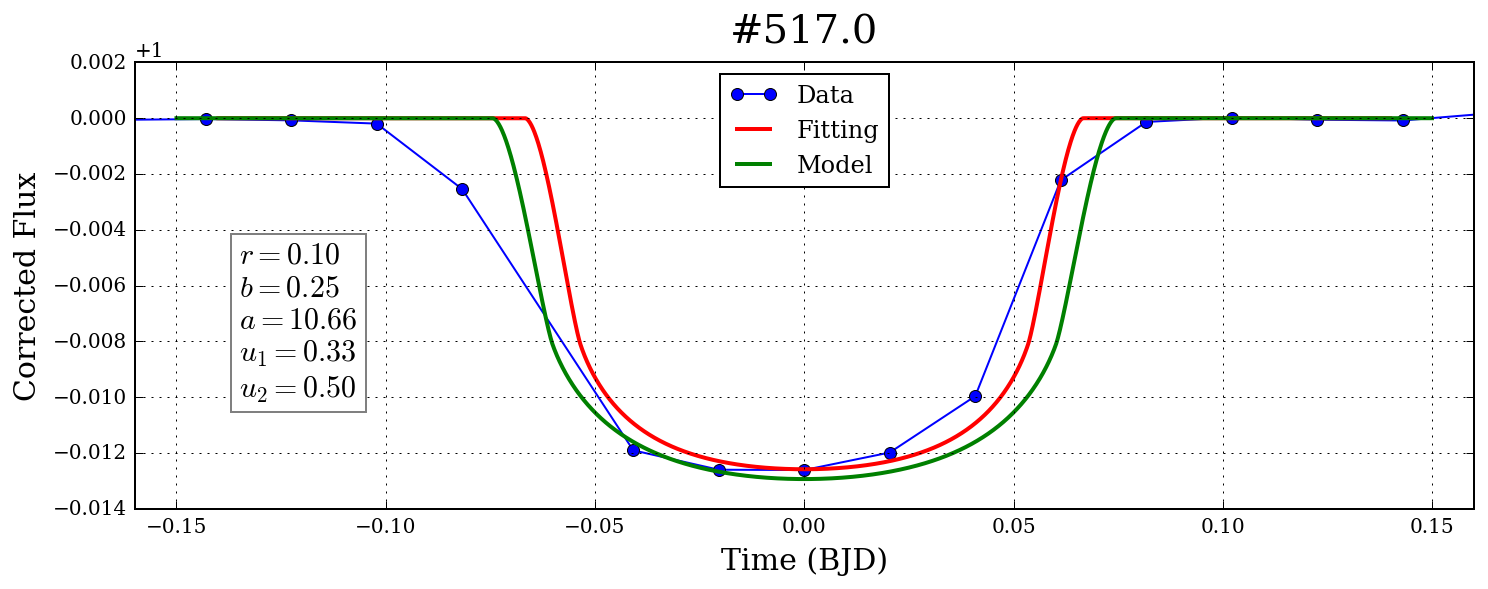

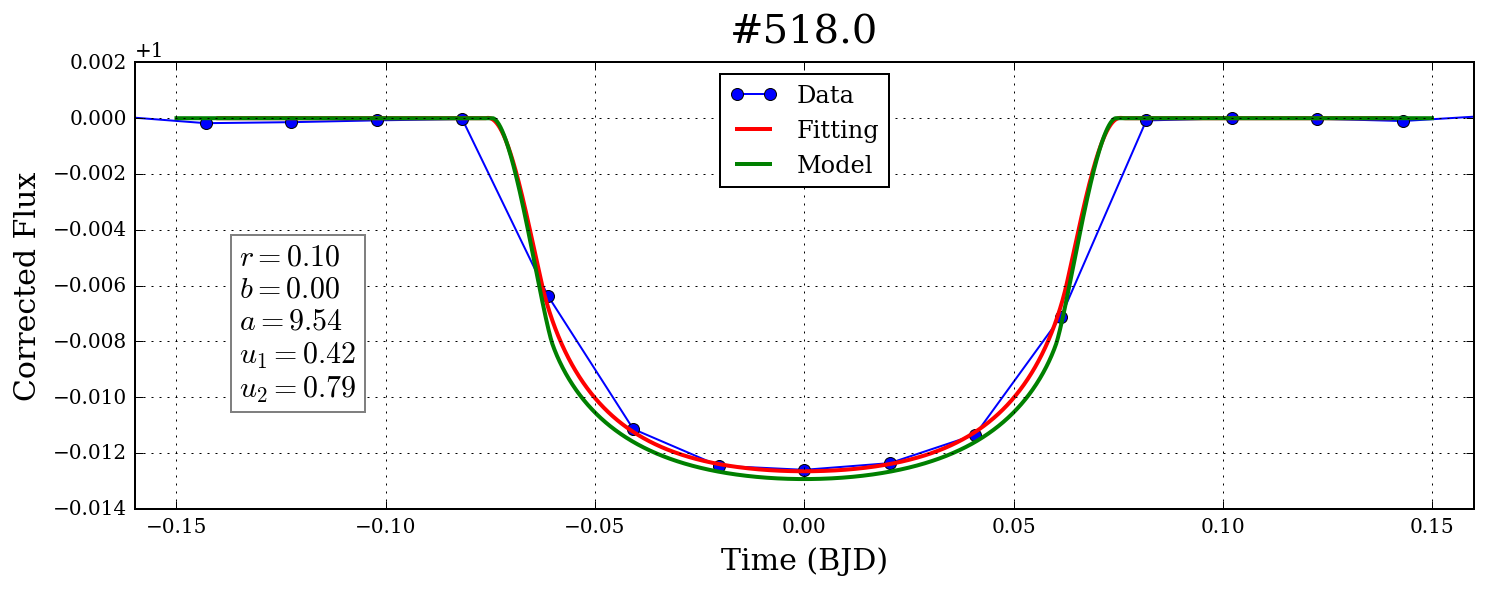

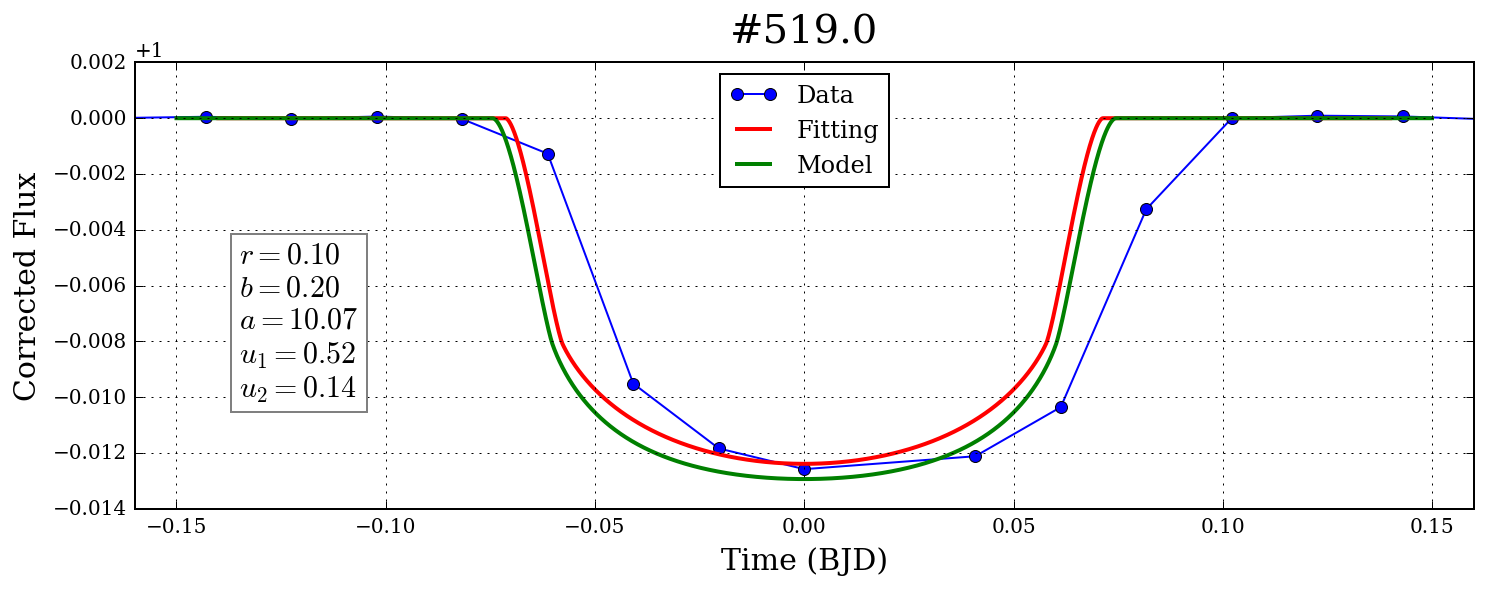

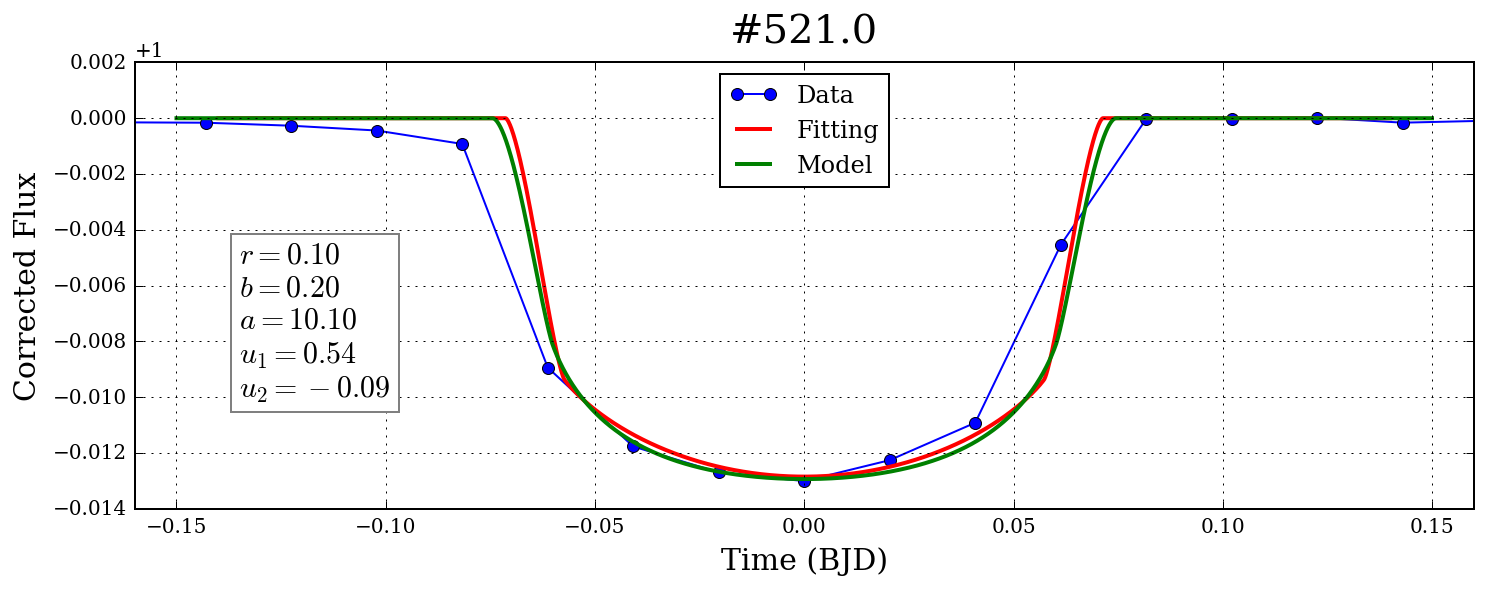

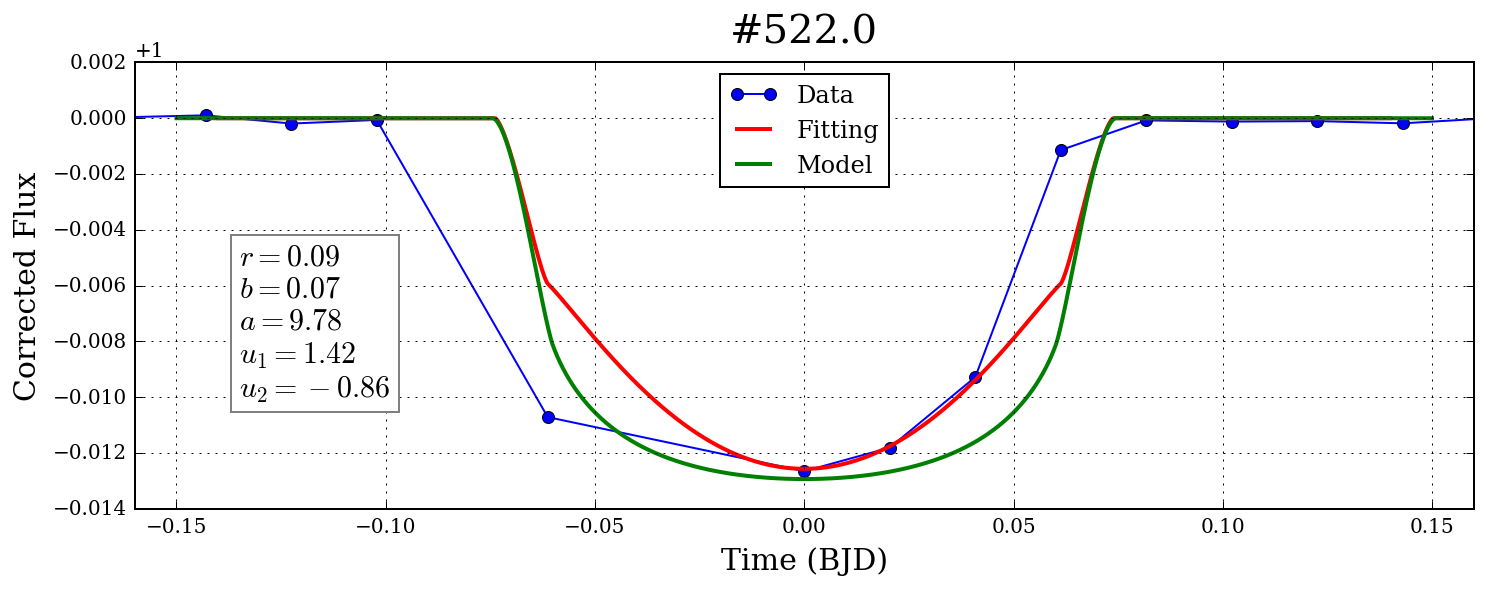

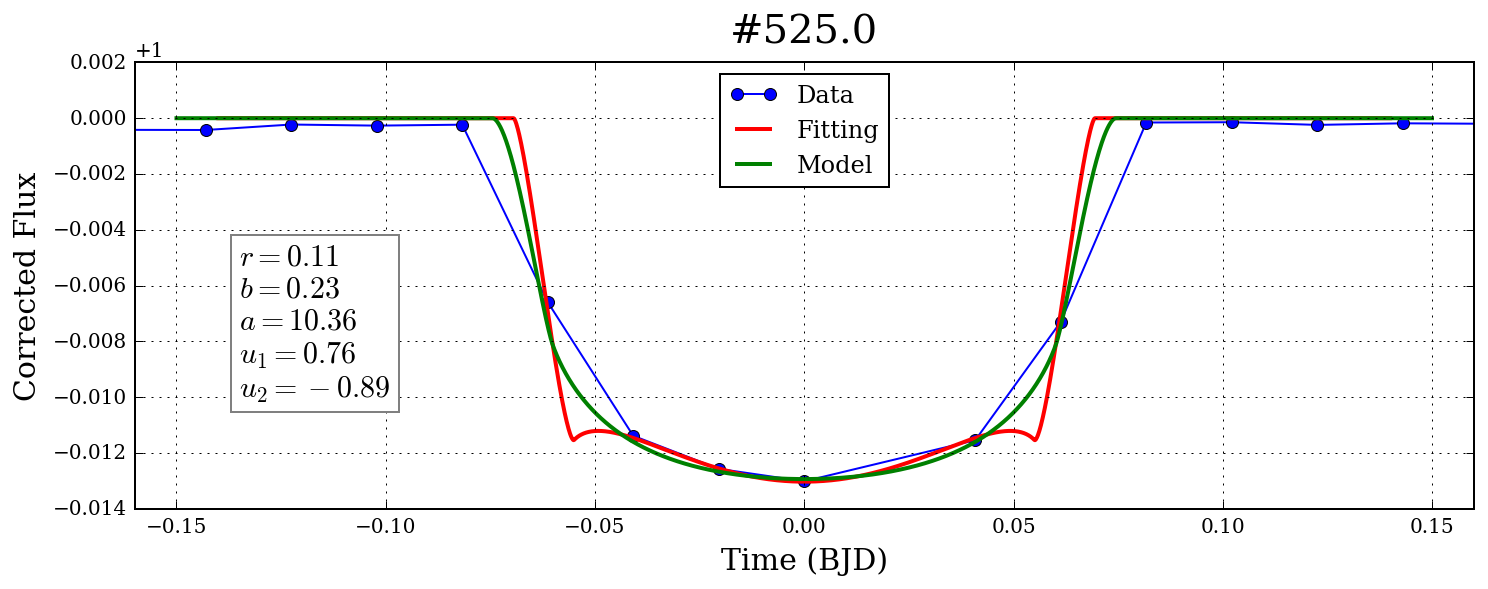

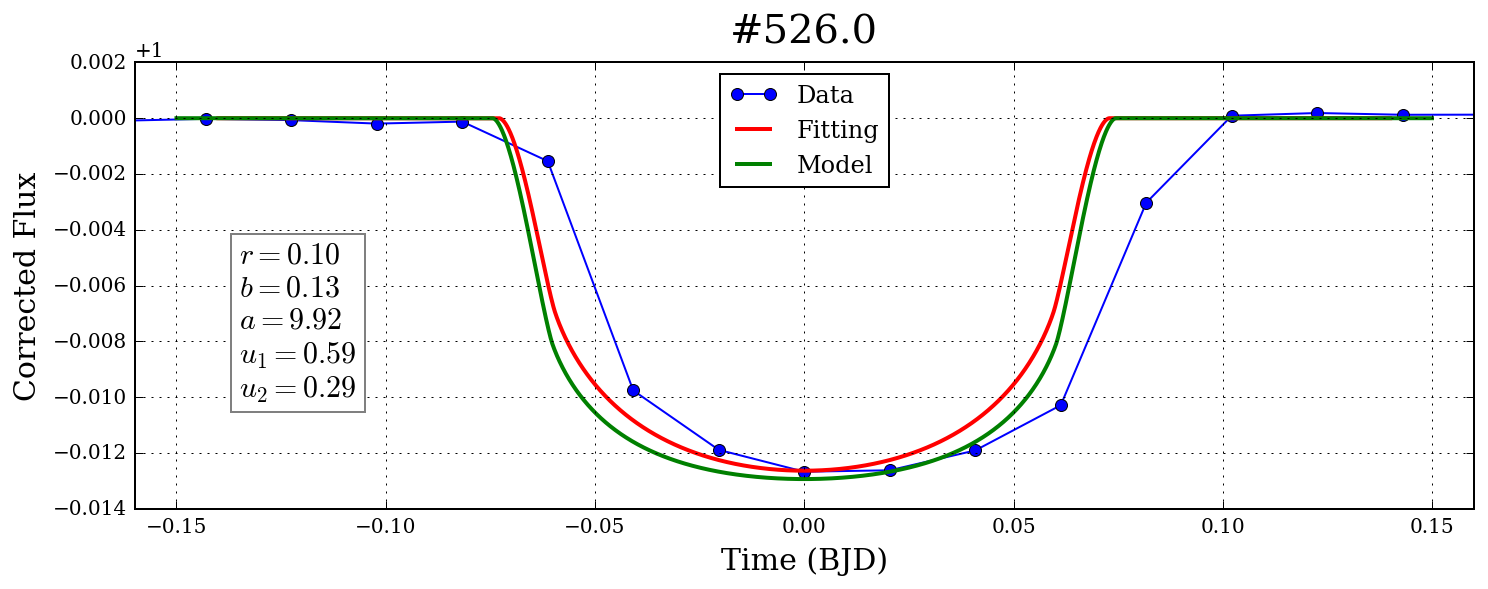

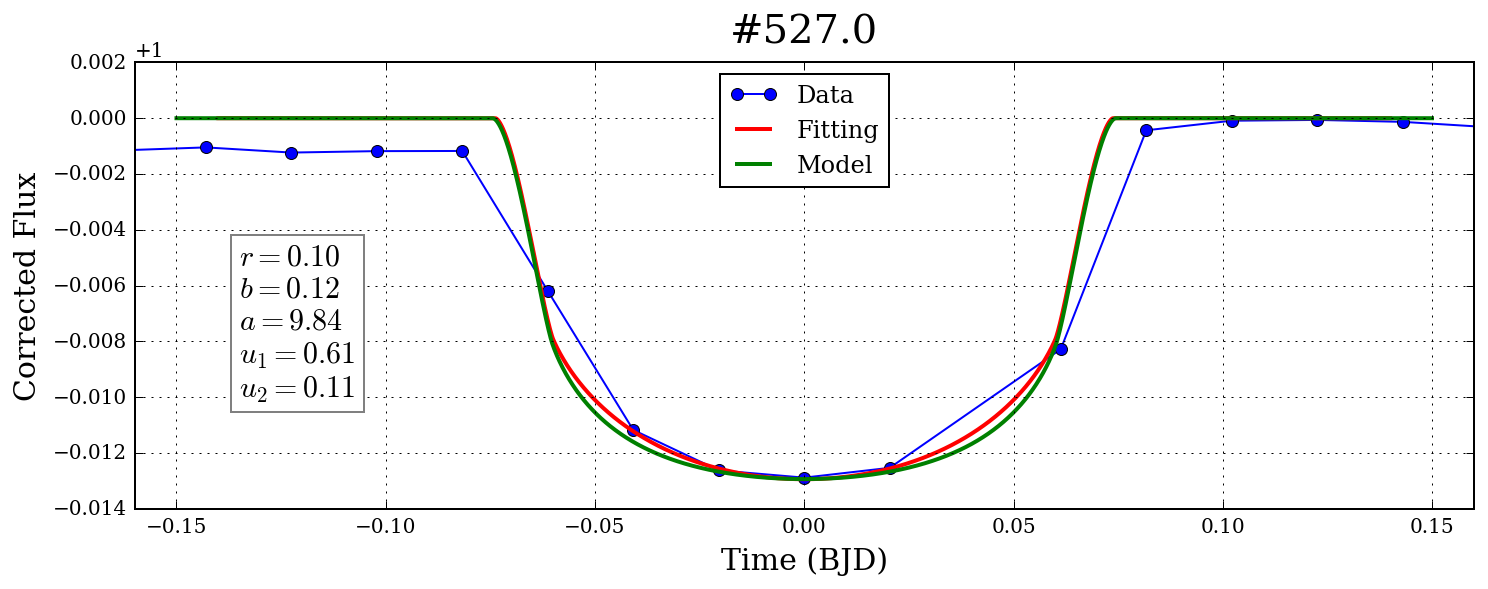

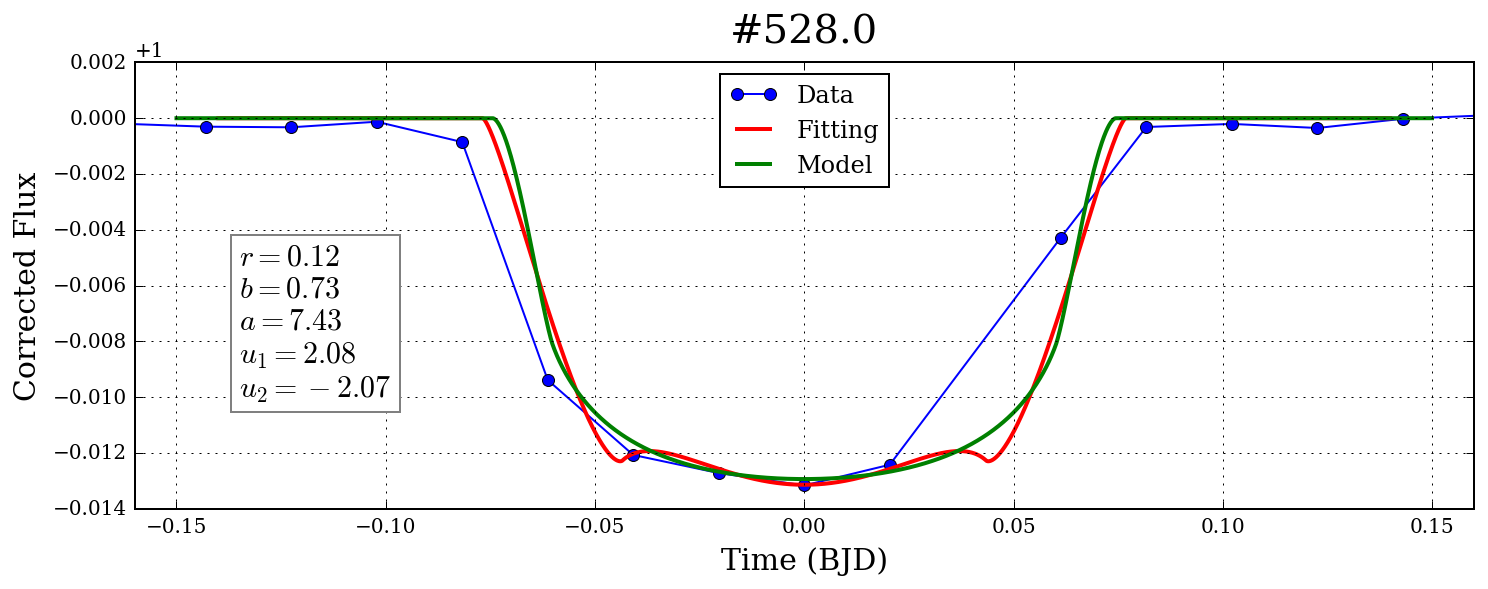

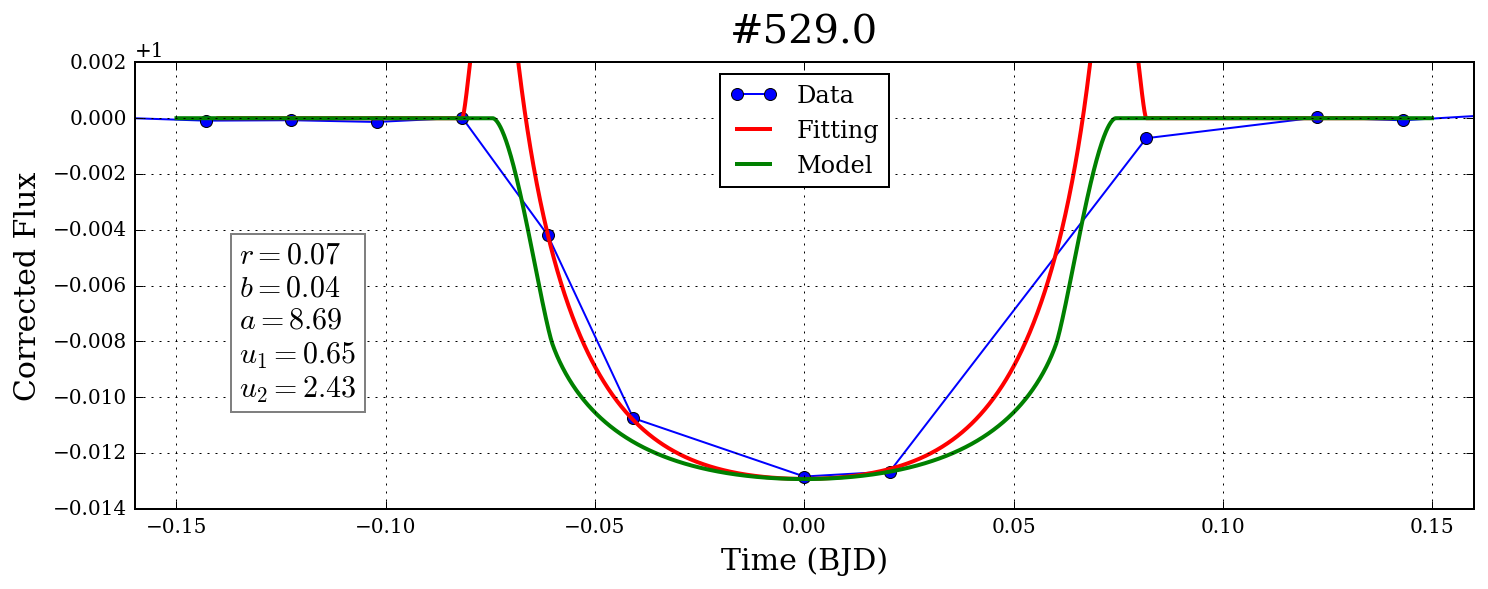

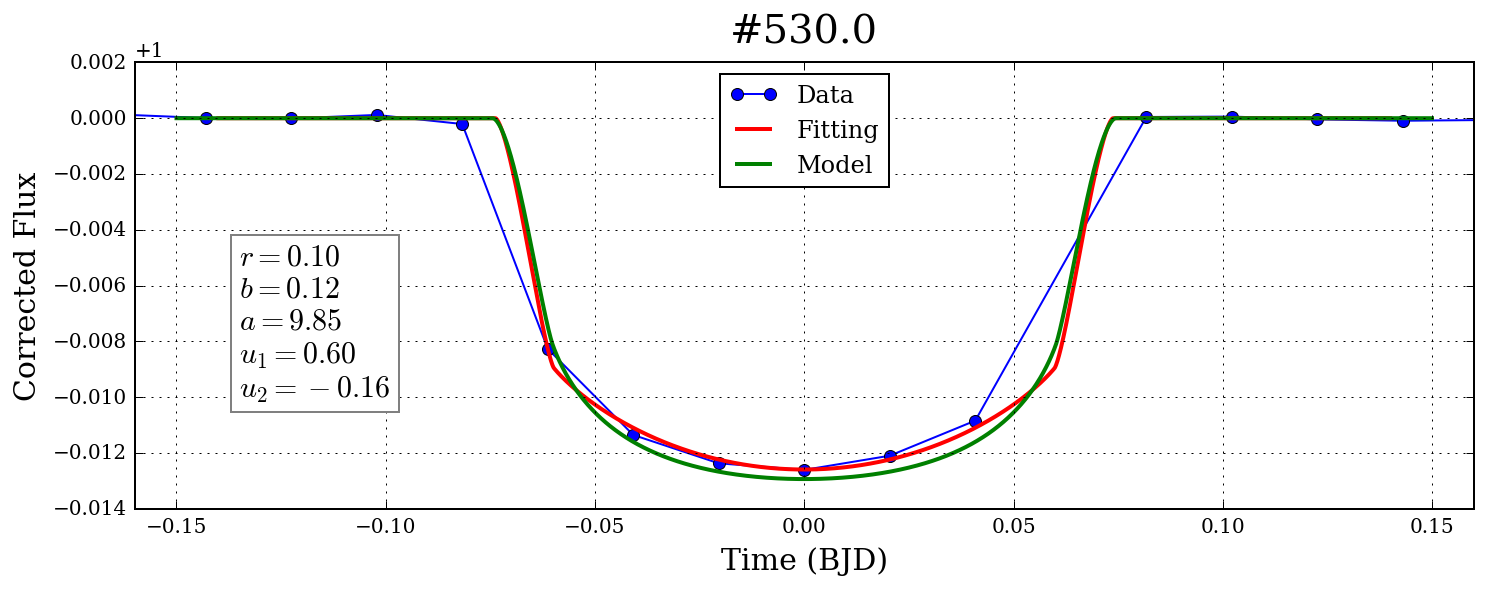

In [9]:
parms = {"r": [], "b": [], "a": [], "u1": [], "u2": []}
for tn in set(df["tn"]):
    [r, b, a, u1, u2] = main(tn)
    parms["r"].append(r)
    parms["b"].append(b)
    parms["a"].append(a)
    parms["u1"].append(u1)
    parms["u2"].append(u2)

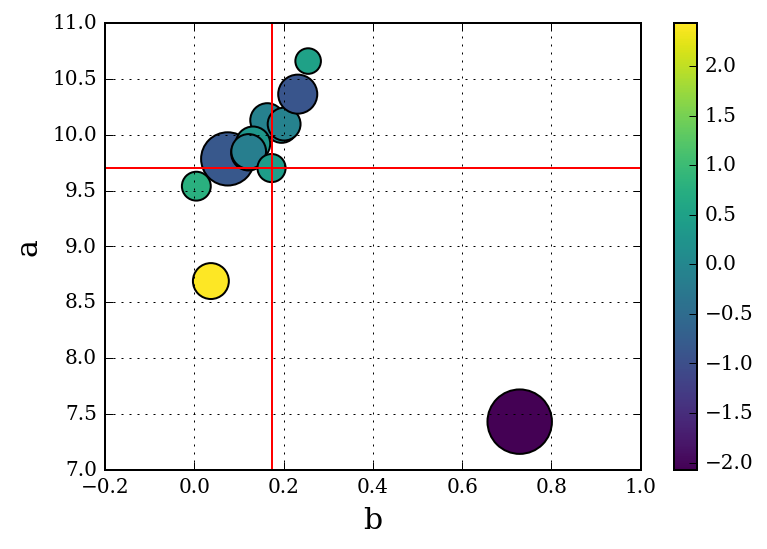

In [12]:
plt.scatter(
    parms["b"] + [0.173],
    parms["a"] + [9.702],
    s=np.array(parms["u1"] + [0.396]) * 500,
    c=np.array(parms["u2"] + [0.423]),
    cmap="viridis",
)
plt.axvline(x=0.173, color="r")
plt.axhline(y=9.702, color="r")
plt.xlabel("b", fontsize=15)
plt.ylabel("a", fontsize=15)
plt.colorbar()
plt.grid()
plt.savefig("parm.png", dpi=300)
plt.show()

In [11]:
parms2 = pd.DataFrame()
for p in parms:
    parms2[p] = parms[p][:-3] + parms[p][-1:]

In [21]:
parms2.describe()

r          b          a         u1         u2
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.100764   0.150138  10.025464   0.637063  -0.027249
std     0.004668   0.075527   0.317655   0.297619   0.531444
min     0.092110   0.004536   9.539668   0.326454  -0.885836
25%     0.098487   0.121654   9.840001   0.527738  -0.145937
50%     0.101120   0.147546   9.996380   0.588448   0.006509
75%     0.103062   0.199800  10.121599   0.605738   0.254019
max     0.109104   0.254997  10.660697   1.416237   0.790378

In [24]:
print(parms2.describe().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &          r &          b &          a &         u1 &         u2 \\
\midrule
count &  10.000000 &  10.000000 &  10.000000 &  10.000000 &  10.000000 \\
mean  &   0.100764 &   0.150138 &  10.025464 &   0.637063 &  -0.027249 \\
std   &   0.004668 &   0.075527 &   0.317655 &   0.297619 &   0.531444 \\
min   &   0.092110 &   0.004536 &   9.539668 &   0.326454 &  -0.885836 \\
25\%   &   0.098487 &   0.121654 &   9.840001 &   0.527738 &  -0.145937 \\
50\%   &   0.101120 &   0.147546 &   9.996380 &   0.588448 &   0.006509 \\
75\%   &   0.103062 &   0.199800 &  10.121599 &   0.605738 &   0.254019 \\
max   &   0.109104 &   0.254997 &  10.660697 &   1.416237 &   0.790378 \\
\bottomrule
\end{tabular}



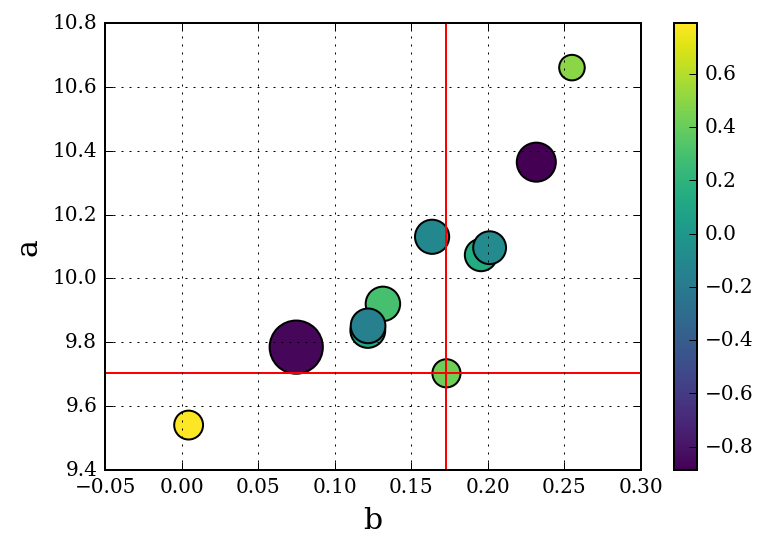

In [74]:
plt.scatter(
    parms2["b"] + [0.173],
    parms2["a"] + [9.702],
    s=np.array(parms2["u1"] + [0.396]) * 500,
    c=np.array(parms2["u2"] + [0.423]),
    cmap="viridis",
)
plt.axvline(x=0.173, color="r")
plt.axhline(y=9.702, color="r")
plt.xlabel("b", fontsize=15)
plt.ylabel("a", fontsize=15)
plt.colorbar()
plt.grid()
plt.show()

In [25]:
print("行星半径：%.3f±%.3f (地球半径)" % (parms2["r"].mean() * 1.104 / 0.0091577),parms2["r"].std() * 1.104 / 0.0091577))

行星半径：12.15 (地球半径)
行星半径：0.56 (地球半径)


In [27]:
print("轨道倾角：%.2f" % (np.arccos(parms2["b"].mean() / parms2["a"].mean()) / np.pi * 180))

轨道倾角：89.14
